# EDA (IBM Coursera - Ignacio Sánchez Barraza)

## Dataset : Wine Data - Sklearn Datasets

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `iris_data.csv` found in the [data](data/) directory.

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
from sklearn.mixture import GaussianMixture
from scipy.signal import find_peaks
from matplotlib.font_manager import FontProperties
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

sns.set_context('notebook')

In [3]:
# Define some functions

def mk_plots(data):
    # Create plots

    for ind, col in enumerate(data.columns.to_list()):
        fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(20,10), tight_layout=True, num=ind)

        # Get data from column
        data_suff_col = pd.DataFrame(data[[col]])

        # Histogram plot

        # Plot PDF
        kde = data_suff_col.plot(kind = "kde", color='cornflowerblue', ax=ax1, alpha = 1, label='_nolegend_')
        hist = data_suff_col.plot(kind = "hist", color='cornflowerblue', density=True, bins=100, ax=ax1, alpha = 0.5, label='_nolegend_')

        # Plot CDF
        cdf = data_suff_col.plot(kind = "hist", color='cornflowerblue', density=True, bins=100, ax=ax2, alpha = 0.5, cumulative=True, label='_nolegend_')

        # Calculate percentiles
        quant_0, quant_25, quant_50, quant_75, quant_99 = (data_suff_col[col].quantile(0.0013),
                                                           data_suff_col[col].quantile(0.25),
                                                           data_suff_col[col].quantile(0.50),
                                                           data_suff_col[col].quantile(0.75),
                                                           data_suff_col[col].quantile(0.9987))

        # [quantile, opacity, length]
        quants = [[quant_0,'k','P0.13 (3-sigma)'],
                  [quant_25,'r','P25'],
                  [quant_50,'g', 'P50'],
                  [quant_75,'b','P75'],
                  [quant_99,'k','P99.87 (3-sigma)']]

        # Plot the lines with a loop
        for i in quants:
            if i[1]=='k':
                ax1.axvline(i[0], alpha=0.5, linestyle='--', color=i[1], label=i[2])
                ax2.axvline(i[0], alpha=0.5, linestyle='--', color=i[1], label=i[2])
            else:
                ax1.axvline(i[0], alpha=1, linestyle='--', color=i[1], label=i[2])
                ax2.axvline(i[0], alpha=1, linestyle='--', color=i[1], label=i[2])

        '''
        # Plot pdf and cdf
        data_suff_col.hist(column=col, ax=ax1, bins=100)
        data_suff_col.hist(column=col, cumulative=True, ax=ax2, bins=100)
        '''

    #     # Plot Gaussians

    # #     # Find number of gaussians to plot
    # #     kde = data_suff_col.plot(kind = "kde")
    # #     x = kde.get_children()[0]._x  # Get X data from kde plot Line2D children
    # #     y = kde.get_children()[0]._y  # Get Y data from kde plot Line2D children
    # #     peaks = find_peaks(y, height=0)

    # #     m_g = x[peaks[0]].reshape(-1,1)  # Get values of peaks for means_init
    # #     n_g = len(peaks[0])  # Get number of peaks

    #     # Set gaussian mixture
    #     #mixture = GaussianMixture(n_components=n_g, means_init=m_g, covariance_type='full').fit(data_suff_col.values.reshape(-1, 1))
    #     mixture = GaussianMixture(covariance_type='full').fit(data_suff_col.values.reshape(-1, 1))
    #     #mixture = GaussianMixture(n_components=n_g, covariance_type='full').fit(data_suff_col.values.reshape(-1, 1))

    #     means_hat = mixture.means_.flatten()
    #     weights_hat = mixture.weights_.flatten()
    #     sds_hat = np.sqrt(mixture.covariances_).flatten()

    #     # Plot data
    #     for mu, sd, w in zip(means_hat, sds_hat, weights_hat):
    #         x_axis = np.linspace(mu-3*sd, mu+3*sd, 1000)
    #         # Plot gaussians
    #         ax3.plot(x_axis, w*norm.pdf(x_axis, mu, sd))
    #     # Plot histogram
    #     hist = data_suff_col.plot(kind = "hist", density=True, bins=100, ax=ax3, alpha = 0.5, color='cornflowerblue', label='_nolegend_')

        # Plot log transformation

        kde = np.log1p(data_suff_col).replace([np.inf, -np.inf], np.nan).plot(kind = "kde", color='cornflowerblue', ax=ax3, alpha = 1, label='_nolegend_')
        hist = np.log1p(data_suff_col).replace([np.inf, -np.inf], np.nan).plot(kind = "hist", color='cornflowerblue', density=True, bins=100, ax=ax3, alpha = 0.5, label='_nolegend_')

        # Quantile-Quantile Plot

        qqplot(data_suff_col[col], line='s', ax=ax4)  # Compare distribution with an standard normal distribution

        # Box plot

        #data.boxplot(column=col, ax=ax4)
        data_suff_col.boxplot(ax=ax5)

        # Create table with statistics

        text = [np.format_float_scientific(data_suff_col.mean()[0]),
                np.format_float_scientific(np.median(data_suff_col)),
                np.format_float_scientific(sp.stats.mode(data_suff_col)[0][0][0]),
                np.format_float_scientific(data_suff_col.std()[0]),
                np.format_float_scientific(data_suff_col.std()[0]**2),
                np.format_float_scientific(data_suff_col.min()[0]),
                np.format_float_scientific(data_suff_col.max()[0]),
                np.format_float_scientific(quant_25),
                np.format_float_scientific(quant_50),
                np.format_float_scientific(quant_75)]

        labels = ['Mean',
                  'Median',
                  'Mode',
                  'Standard Deviation',
                  'Variance',
                  'Min',
                  'Máx',
                  'P25',
                  'P50 (Median)',
                  'P75']

        df_table = pd.DataFrame({'Name':labels, 'Value':text})

        tab = ax6.table(cellText=df_table.values, colLabels=df_table.columns, loc='center', fontsize=20)

        for ind, (key, cell) in enumerate(tab.get_celld().items()):
            cell.set_linewidth(0.2)
            cell.set_text_props(ha='center')

        # Set bold text for column headers
        tab.get_celld()[(0,0)].set_text_props(fontproperties=FontProperties(weight='bold'))
        tab.get_celld()[(0,1)].set_text_props(fontproperties=FontProperties(weight='bold'))

        # Hide axes
        ax6.patch.set_visible(False)
        ax6.axis('off')
        ax6.axis('tight')

        # Set axis labels
        ax1.set_xlabel('Values')
        ax2.set_xlabel('Values')
        ax4.set_ylabel('Values')
        ax5.set_xlabel('Values')

        # Set legend
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper left')

        # Set titles
        ax1.set_title('Probability Density Function')
        ax2.set_title('Cumulative Distribution Function')
        ax3.set_title('Log1p transformation')
        ax4.set_title('Quantile Quantile Plot')
        ax5.set_title('Box Plot')
        ax6.set_title('Statistics')
        fig.suptitle(col)

        # Set tight_layout
        fig.tight_layout()

        # Reformat name of col to avoid error
        replace_list = [':','/','.']

        old_col = col
        for x in replace_list:
            col = col.replace(x, '_')
        new_col = col

        # Save histograms
        #fig.savefig(dists_path + '/' + new_col + '_' + just_this + suff + '.png')
        
        # Show plots
        plt.show()
        
        pass

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [43]:
# Load data of dataset
data = datasets.load_wine(as_frame=True)
# Transform dataset to DataFrame
data = pd.DataFrame(data.data.iloc[:,:4].assign(target=data.target))  # Select only 4 features to faster the computations
# Show data
data

alcohol  malic_acid   ash  alcalinity_of_ash  target
0      14.23        1.71  2.43               15.6       0
1      13.20        1.78  2.14               11.2       0
2      13.16        2.36  2.67               18.6       0
3      14.37        1.95  2.50               16.8       0
4      13.24        2.59  2.87               21.0       0
..       ...         ...   ...                ...     ...
173    13.71        5.65  2.45               20.5       2
174    13.40        3.91  2.48               23.0       2
175    13.27        4.28  2.26               20.0       2
176    13.17        2.59  2.37               20.0       2
177    14.13        4.10  2.74               24.5       2

[178 rows x 5 columns]

In [44]:
# Get number of target values (possible labels)

data.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [45]:
# Show description (statistics) for features data
data.describe()

alcohol  malic_acid         ash  alcalinity_of_ash      target
count  178.000000  178.000000  178.000000         178.000000  178.000000
mean    13.000618    2.336348    2.366517          19.494944    0.938202
std      0.811827    1.117146    0.274344           3.339564    0.775035
min     11.030000    0.740000    1.360000          10.600000    0.000000
25%     12.362500    1.602500    2.210000          17.200000    0.000000
50%     13.050000    1.865000    2.360000          19.500000    1.000000
75%     13.677500    3.082500    2.557500          21.500000    2.000000
max     14.830000    5.800000    3.230000          30.000000    2.000000

In [46]:
# Show info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   alcohol            178 non-null    float64
 1   malic_acid         178 non-null    float64
 2   ash                178 non-null    float64
 3   alcalinity_of_ash  178 non-null    float64
 4   target             178 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [47]:
data.describe()

alcohol  malic_acid         ash  alcalinity_of_ash      target
count  178.000000  178.000000  178.000000         178.000000  178.000000
mean    13.000618    2.336348    2.366517          19.494944    0.938202
std      0.811827    1.117146    0.274344           3.339564    0.775035
min     11.030000    0.740000    1.360000          10.600000    0.000000
25%     12.362500    1.602500    2.210000          17.200000    0.000000
50%     13.050000    1.865000    2.360000          19.500000    1.000000
75%     13.677500    3.082500    2.557500          21.500000    2.000000
max     14.830000    5.800000    3.230000          30.000000    2.000000

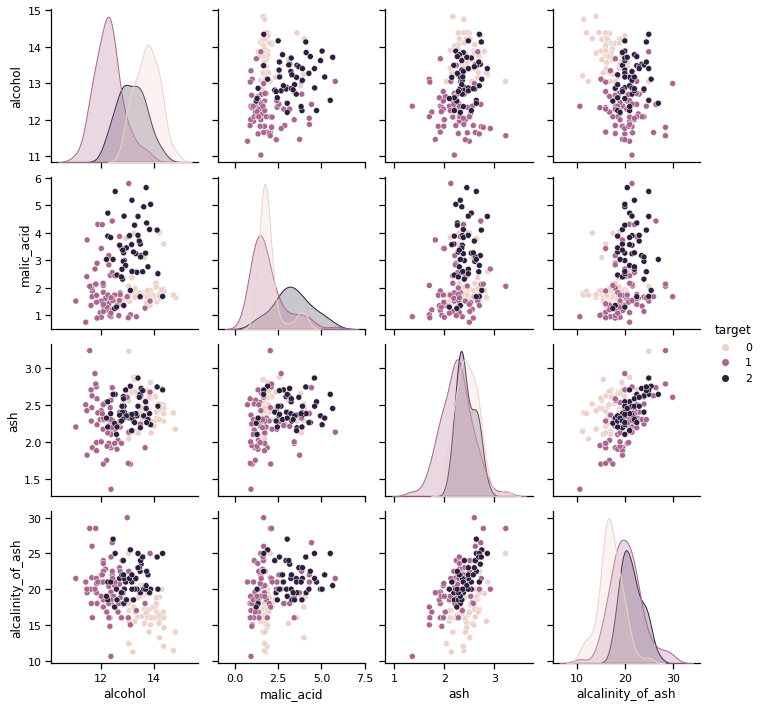

In [48]:
# Make correlation and distribution plots for features
sns.pairplot(data, hue='target')

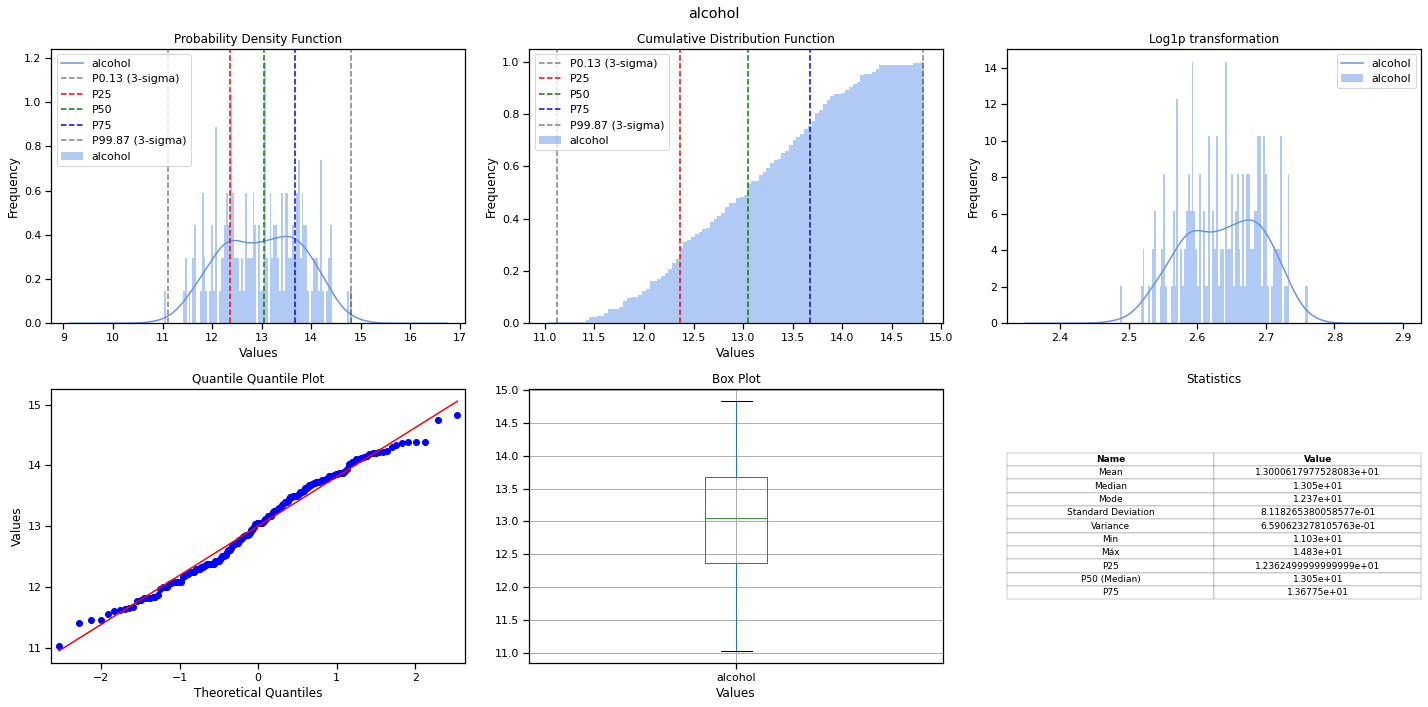

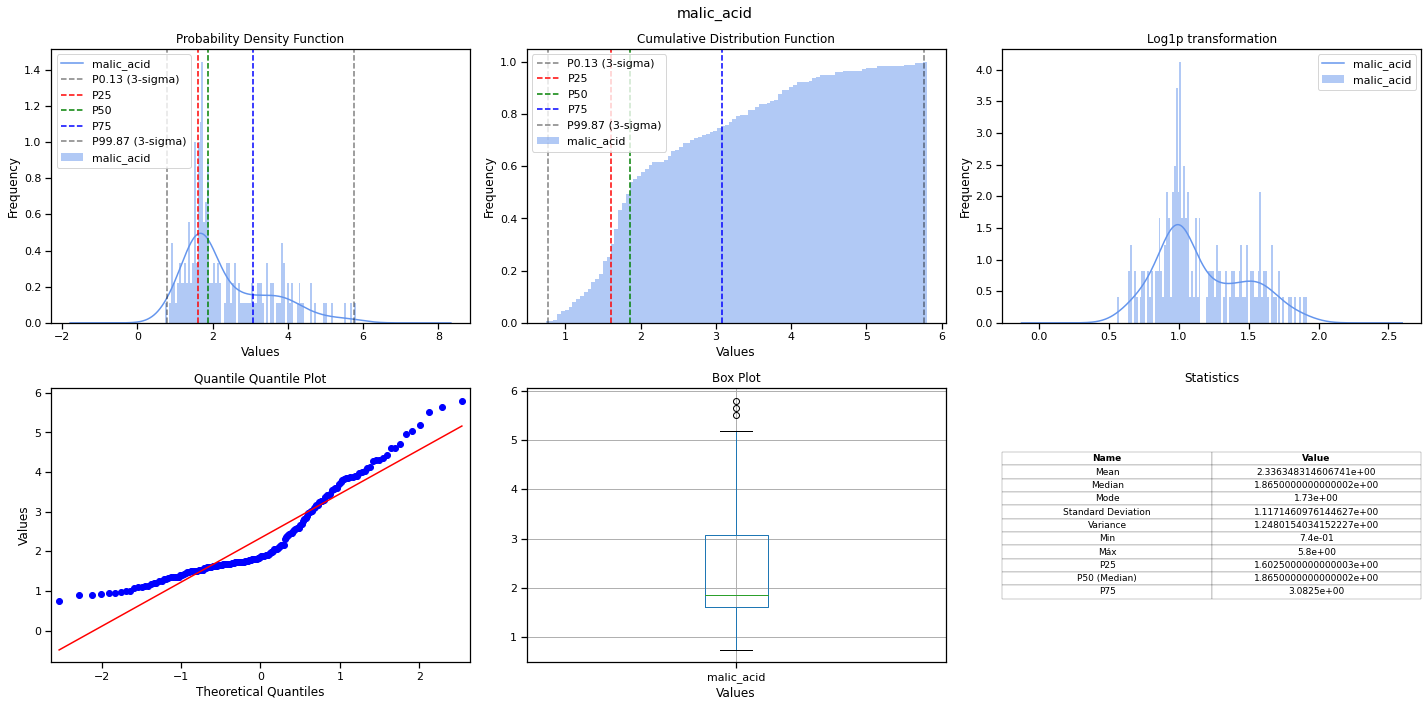

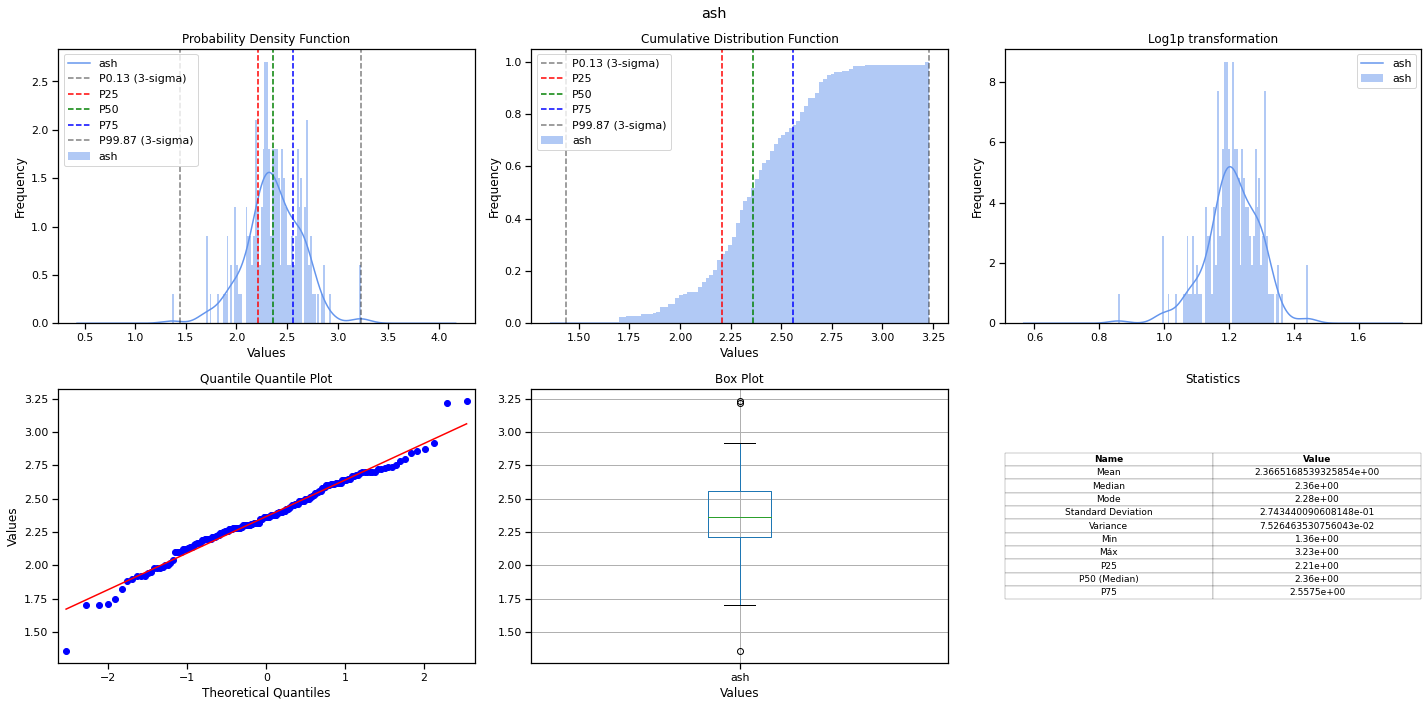

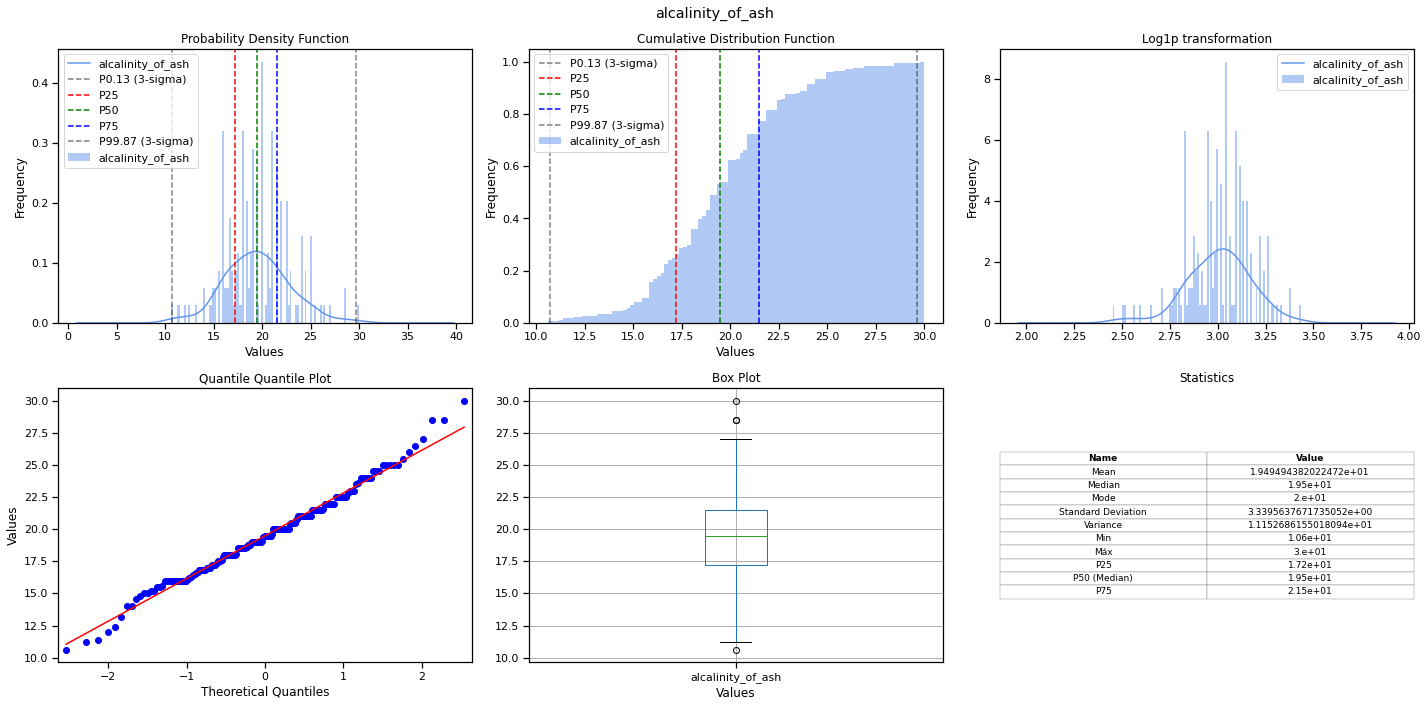

In [49]:
# Create plots
mk_plots(data[data.columns.drop('target')])

In [50]:
# Because there are no categorical features, there is no need to create dummy variables (one hot encoding)

In [65]:
# Remove outliers
z_scores = sp.stats.zscore(data, axis=1)
# Filter data greater than 3-sigma (absolute value)
abs_z_scores = np.abs(z_scores)
filt_data = abs_z_scores > 3
# Replace filtered data with NaNs
data[filt_data] = np.nan
# Show new data
data

alcohol  malic_acid   ash  alcalinity_of_ash  target
0      14.23        1.71  2.43               15.6       0
1      13.20        1.78  2.14               11.2       0
2      13.16        2.36  2.67               18.6       0
3      14.37        1.95  2.50               16.8       0
4      13.24        2.59  2.87               21.0       0
..       ...         ...   ...                ...     ...
173    13.71        5.65  2.45               20.5       2
174    13.40        3.91  2.48               23.0       2
175    13.27        4.28  2.26               20.0       2
176    13.17        2.59  2.37               20.0       2
177    14.13        4.10  2.74               24.5       2

[178 rows x 5 columns]

In [68]:
# Show the min, max, mean and median values of each label
data.groupby('target').agg(['min', 'max', 'mean', 'median'])  # passing a list of recognized strings
data.groupby('target').agg([np.min, np.max, np.mean, np.median])  # passing a list of explicit aggregation functions

alcohol                           malic_acid                         \
          amin   amax       mean  median       amin  amax      mean median   
target                                                                       
0        12.85  14.83  13.744746  13.750       1.35  4.04  2.010678  1.770   
1        11.03  13.86  12.278732  12.290       0.74  5.80  1.932676  1.610   
2        12.20  14.34  13.153750  13.165       1.24  5.65  3.333750  3.265   

         ash                        alcalinity_of_ash                          
        amin  amax      mean median              amin  amax       mean median  
target                                                                         
0       2.04  3.22  2.455593   2.44              11.2  25.0  17.037288   16.8  
1       1.36  3.23  2.244789   2.24              10.6  30.0  20.238028   20.0  
2       2.10  2.86  2.437083   2.38              17.5  27.0  21.416667   21.0

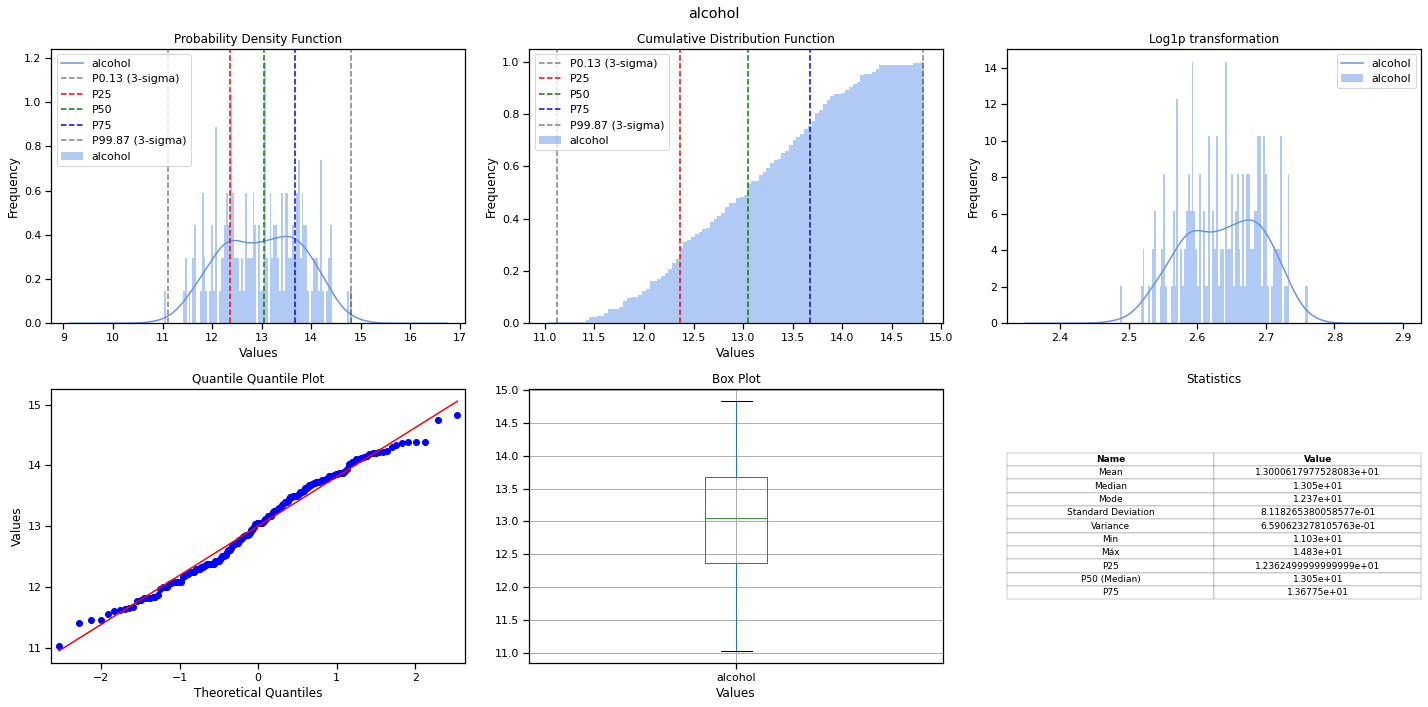

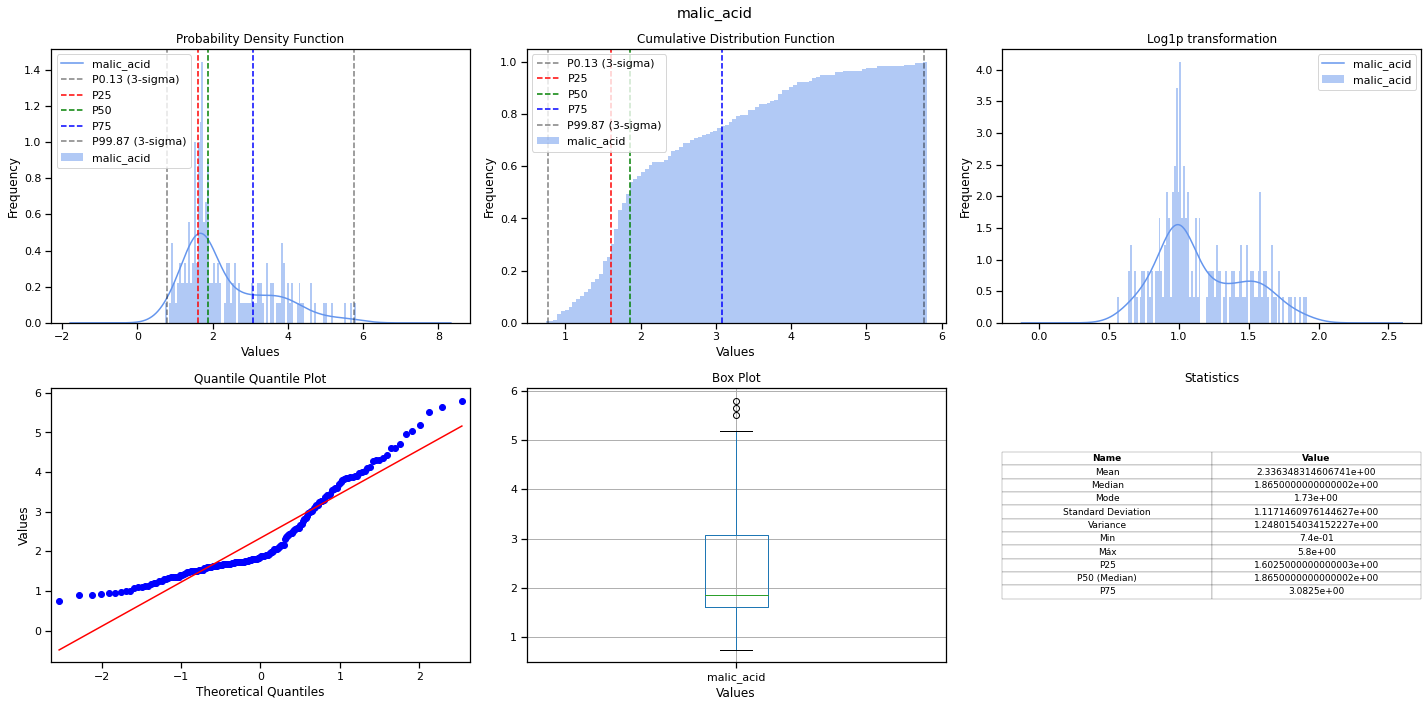

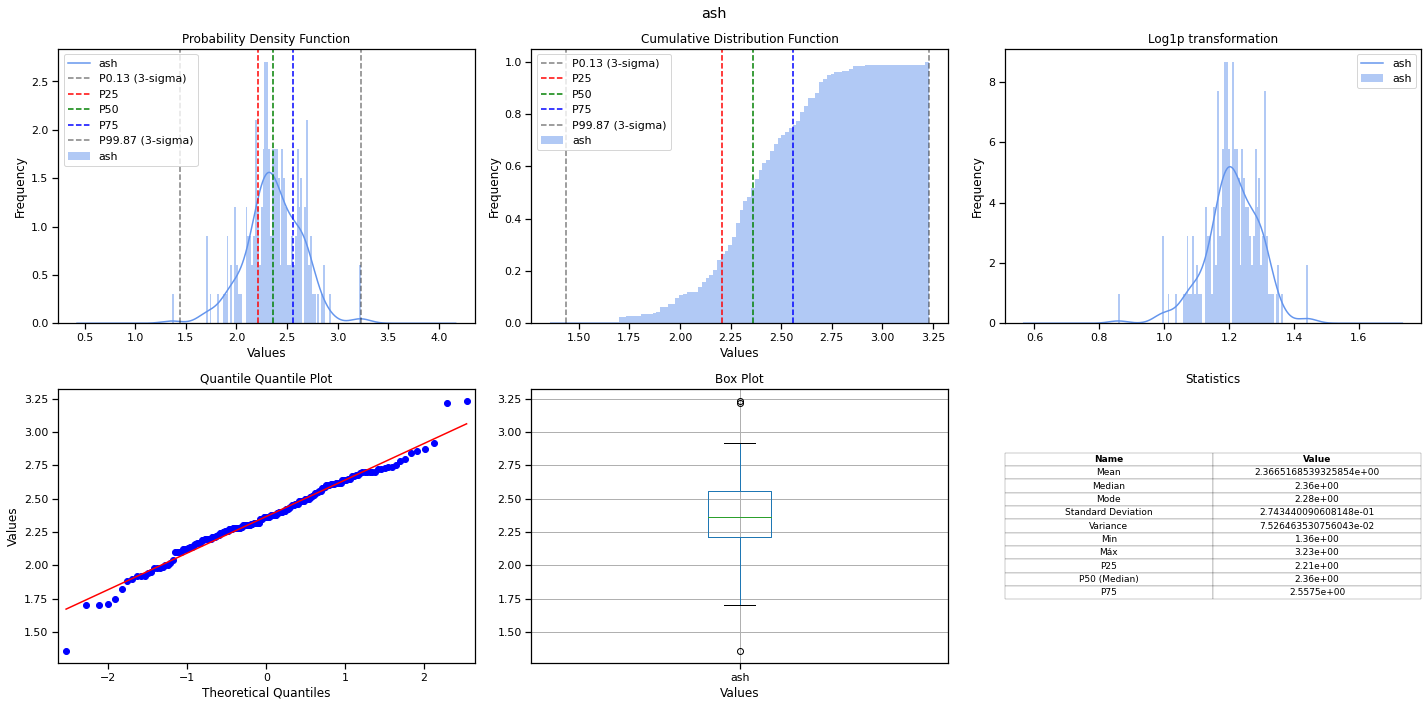

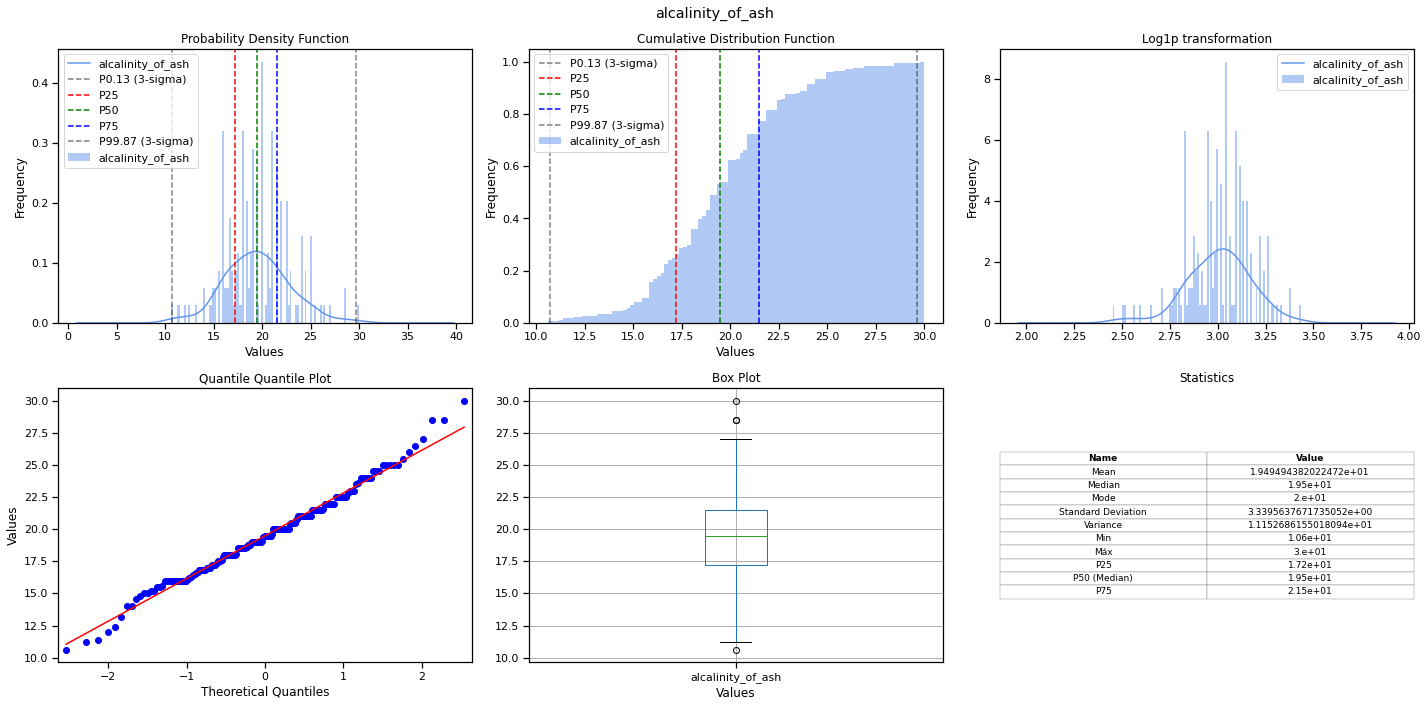

In [69]:
# Create plots after outlier removal
mk_plots(data[data.columns.drop('target')])

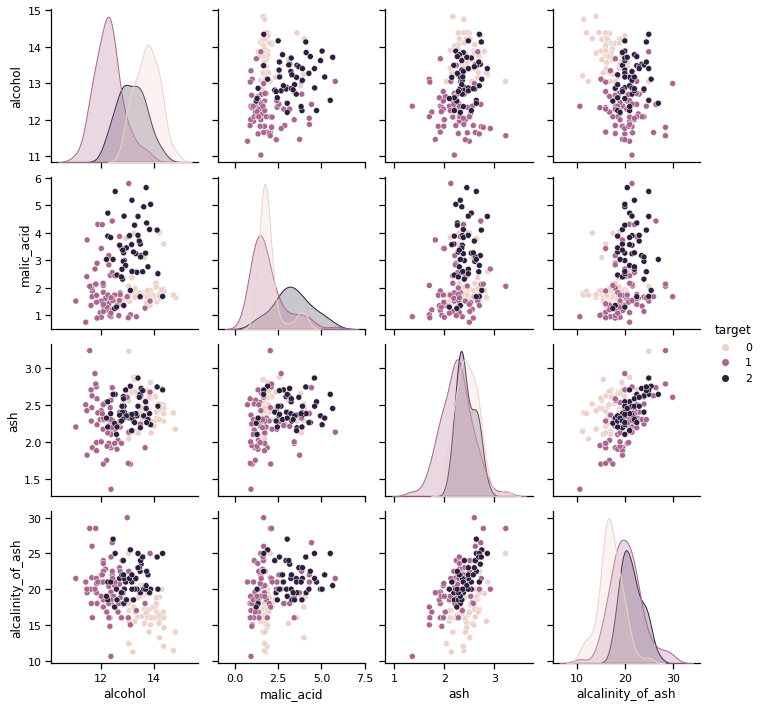

In [70]:
# Make correlation and distribution plots for features
sns.pairplot(data, hue='target')

In [71]:
# Apply log transformation to skew data

# Create a list of float colums to check for skewing
mask = data.dtypes == np.float
float_cols = data.columns[mask]
# Create limit to skew, then get skew values
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

print(skew_cols)

                Skew
malic_acid  1.039651


In [72]:
# Store old data for plots
old_data = data.copy()
# Apply skew correction (log transformation)
log_data = np.log1p(data[skew_cols.index.to_list()])
data = pd.concat([data.drop(columns=skew_cols.index.to_list()), log_data], axis=1)
# Show new data
data

alcohol   ash  alcalinity_of_ash  target  malic_acid
0      14.23  2.43               15.6       0    0.996949
1      13.20  2.14               11.2       0    1.022451
2      13.16  2.67               18.6       0    1.211941
3      14.37  2.50               16.8       0    1.081805
4      13.24  2.87               21.0       0    1.278152
..       ...   ...                ...     ...         ...
173    13.71  2.45               20.5       2    1.894617
174    13.40  2.48               23.0       2    1.591274
175    13.27  2.26               20.0       2    1.663926
176    13.17  2.37               20.0       2    1.278152
177    14.13  2.74               24.5       2    1.629241

[178 rows x 5 columns]

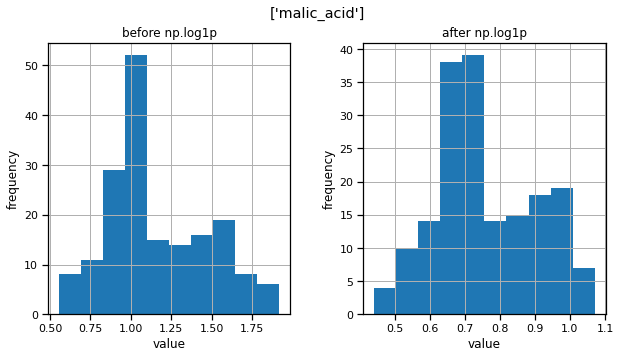

In [73]:
# Plot old data vs new_data

fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
data[skew_cols.index.to_list()].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
data[skew_cols.index.to_list()].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle(f"{skew_cols.index.to_list()}");

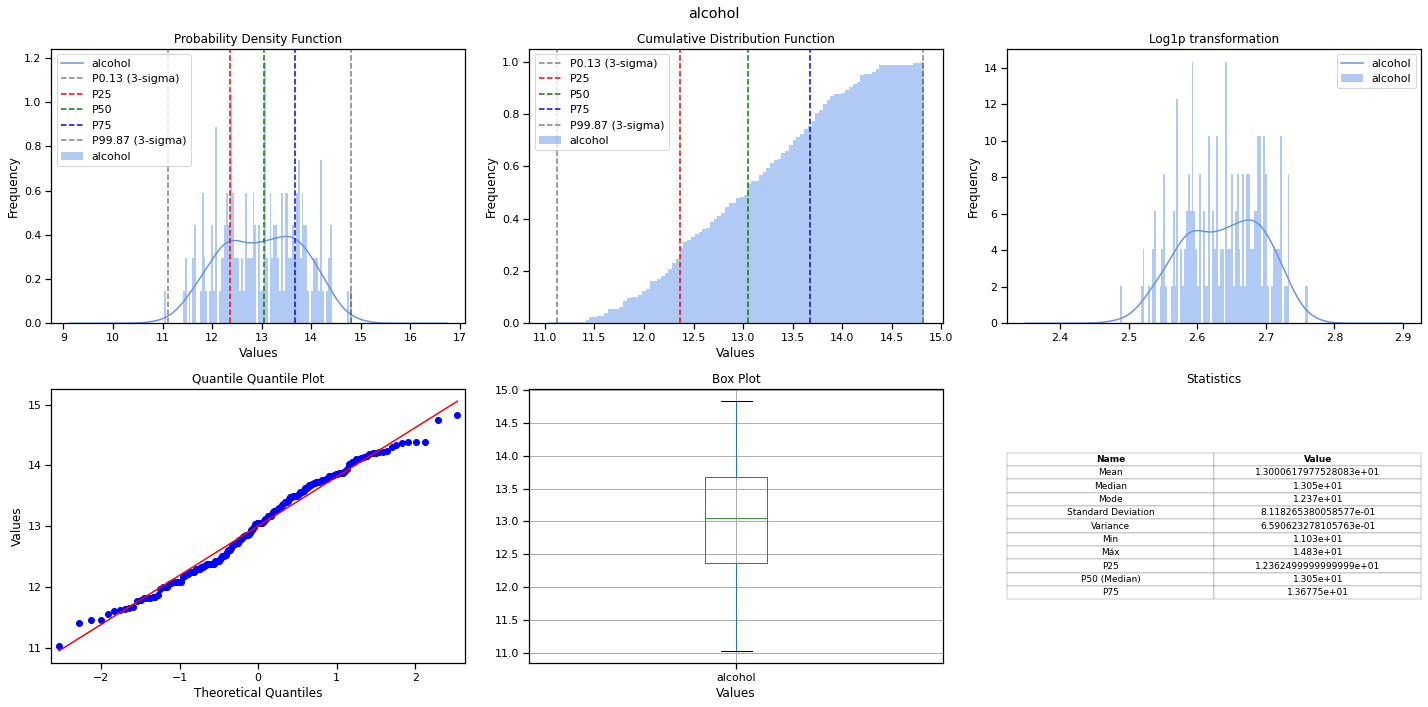

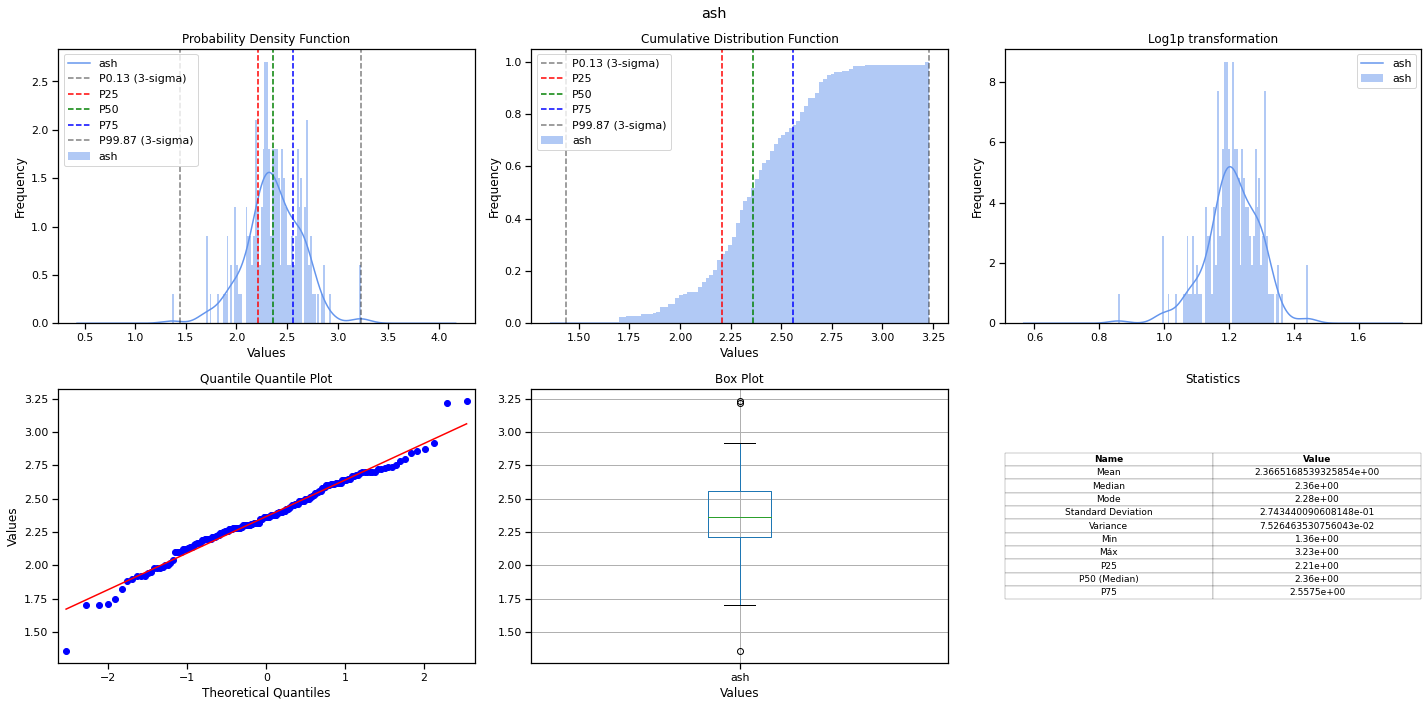

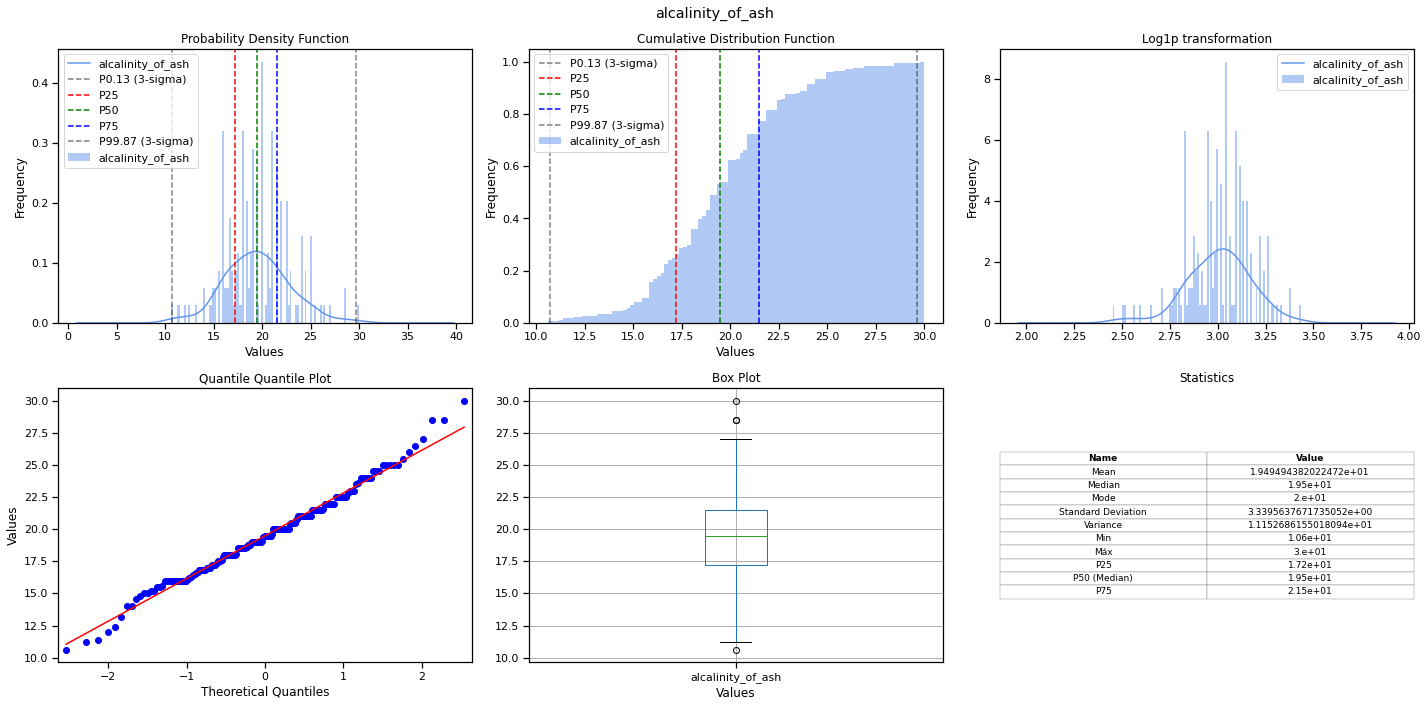

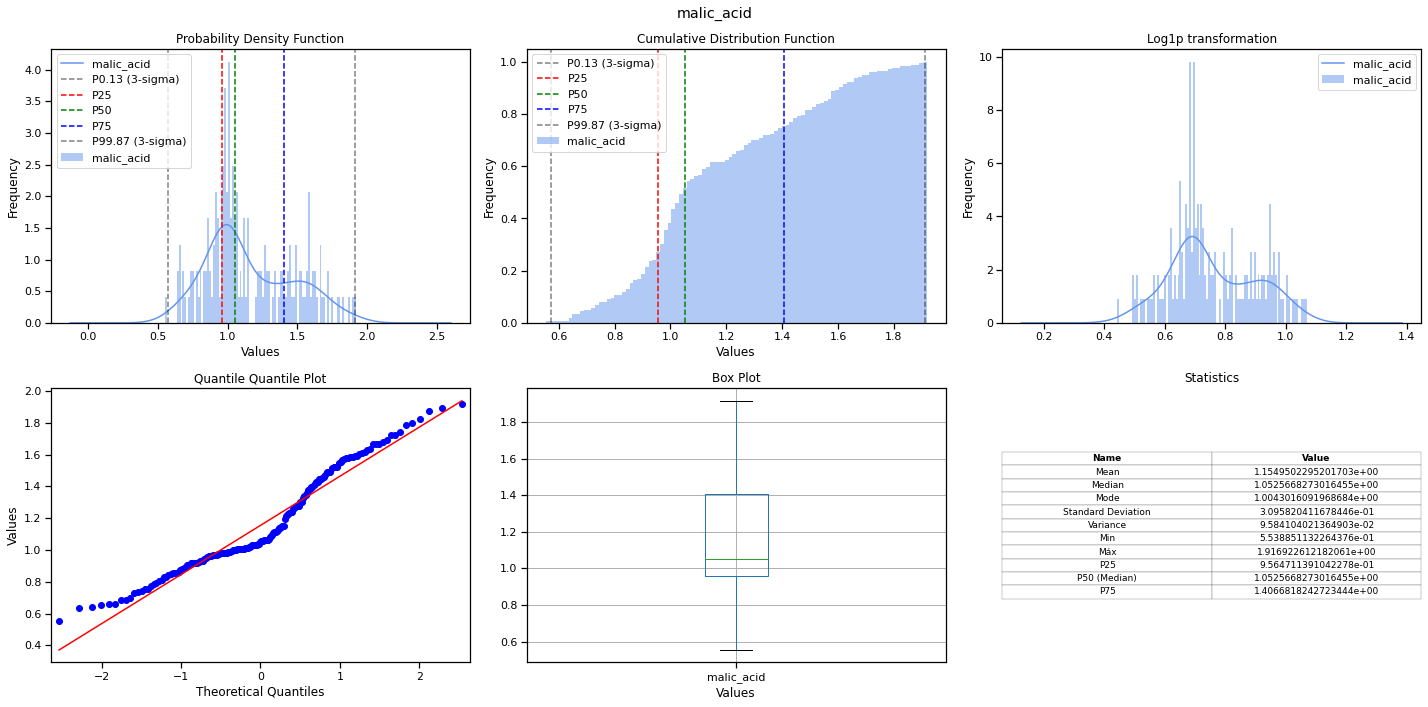

In [74]:
# Create plots after log trasnformation
mk_plots(data[data.columns.drop('target')])

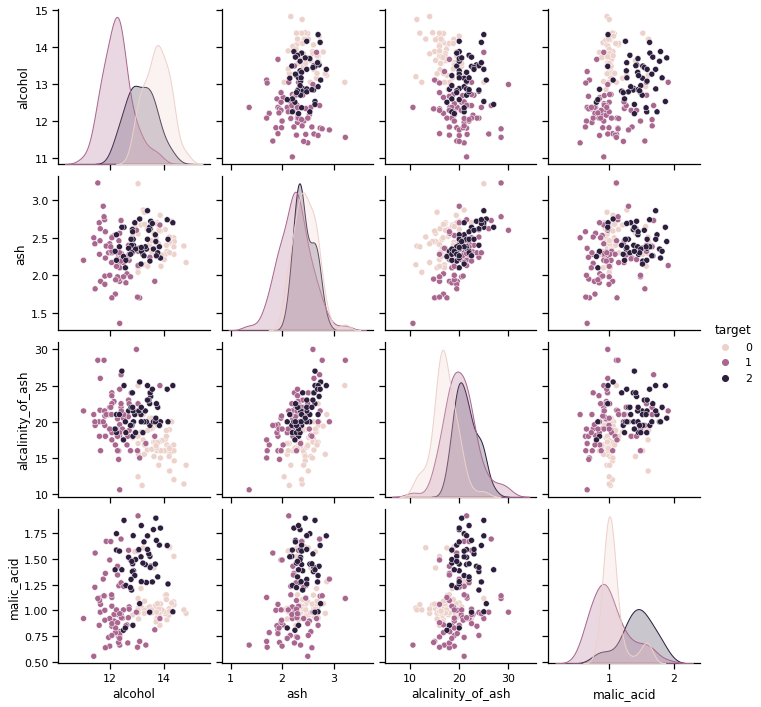

In [75]:
# Make correlation and distribution plots for features
sns.pairplot(data, hue='target')

In [76]:
# Feature engineering (polynomial features)

# Initialize polynomial features function
pf = PolynomialFeatures(degree=2)
# Create polynomial features for all features except target
features = data.columns.drop('target')
print(features)
# Fit function
poly_data = pf.fit_transform(data[features])
data = pd.concat([pd.DataFrame(poly_data, columns = pf.get_feature_names(input_features=features)), data['target']], axis=1)
# Show new data
data

Index(['alcohol', 'ash', 'alcalinity_of_ash', 'malic_acid'], dtype='object')


1  alcohol   ash  alcalinity_of_ash  malic_acid  alcohol^2  \
0    1.0    14.23  2.43               15.6    0.996949   202.4929   
1    1.0    13.20  2.14               11.2    1.022451   174.2400   
2    1.0    13.16  2.67               18.6    1.211941   173.1856   
3    1.0    14.37  2.50               16.8    1.081805   206.4969   
4    1.0    13.24  2.87               21.0    1.278152   175.2976   
..   ...      ...   ...                ...         ...        ...   
173  1.0    13.71  2.45               20.5    1.894617   187.9641   
174  1.0    13.40  2.48               23.0    1.591274   179.5600   
175  1.0    13.27  2.26               20.0    1.663926   176.0929   
176  1.0    13.17  2.37               20.0    1.278152   173.4489   
177  1.0    14.13  2.74               24.5    1.629241   199.6569   

     alcohol ash  alcohol alcalinity_of_ash  alcohol malic_acid   ash^2  \
0        34.5789                    221.988           14.186579  5.9049   
1        28.2480                    147.840           13.496352  4.5796   
2        35.1372                    244.776           15.949143  7.1289   
3        35.9250                    241.416           15.545540  6.2500   
4        37.9988                    278.040           16.922735  8.2369   
..           ...                        ...                 ...     ...   
173      33.5895                    281.055           25.975197  6.0025   
174      33.2320                    308.200           21.323071  6.1504   
175      29.9902                    265.400           22.080299  5.1076   
176      31.2129                    263.400           16.833265  5.6169   
177      38.7162                    346.185           23.021169  7.5076   

     ash alcalinity_of_ash  ash malic_acid  alcalinity_of_ash^2  \
0                   37.908        2.422585               243.36   
1                   23.968        2.188045               125.44   
2                   49.662        3.235882               345.96   
3                   42.000        2.704513               282.24   
4                   60.270        3.668297               441.00   
..                     ...             ...                  ...   
173                 50.225        4.641811               420.25   
174                 57.040        3.946359               529.00   
175                 45.200        3.760473               400.00   
176                 47.400        3.029221               400.00   
177                 67.130        4.464119               600.25   

     alcalinity_of_ash malic_acid  malic_acid^2  target  
0                       15.552399      0.993907       0  
1                       11.451450      1.045406       0  
2                       22.542102      1.468801       0  
3                       18.174327      1.170302       0  
4                       26.841196      1.633673       0  
..                            ...           ...     ...  
173                     38.839646      3.589573       2  
174                     36.599301      2.532153       2  
175                     33.278522      2.768650       2  
176                     25.563044      1.633673       2  
177                     39.916393      2.654425       2  

[178 rows x 16 columns]

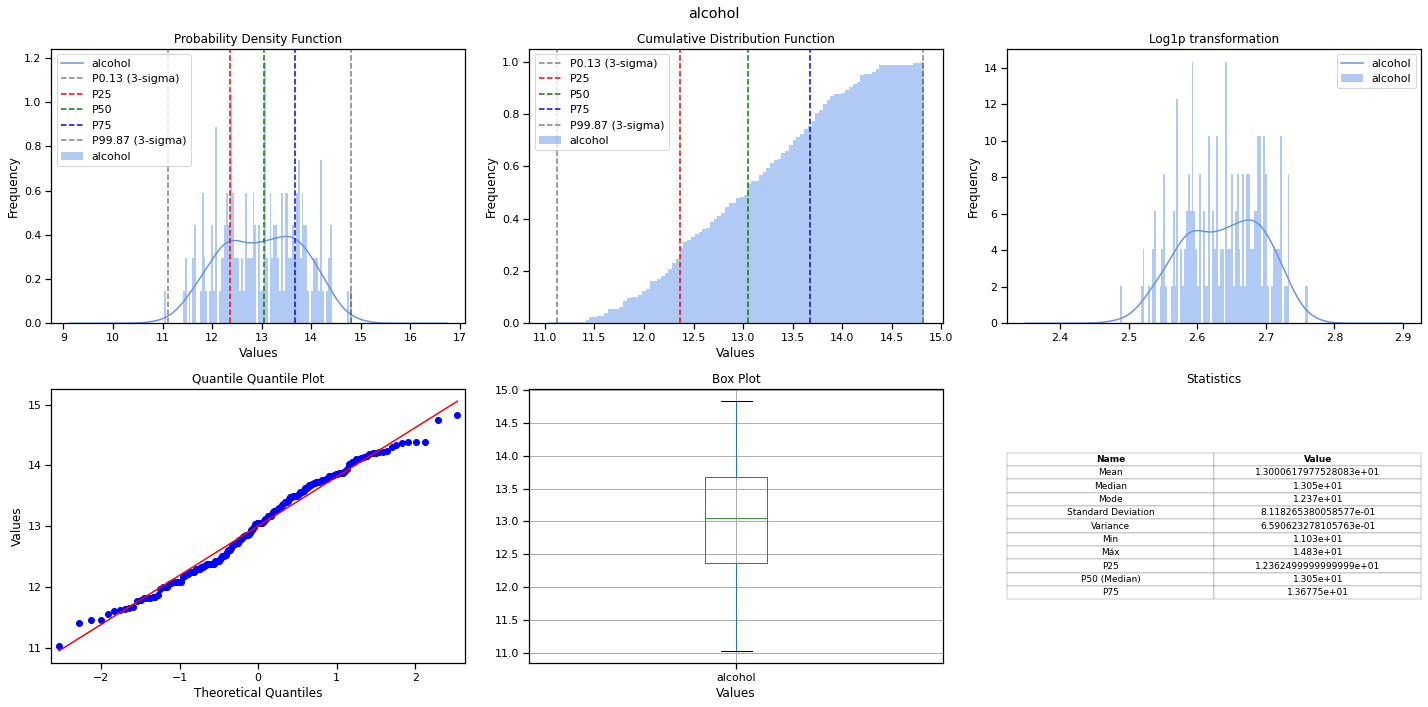

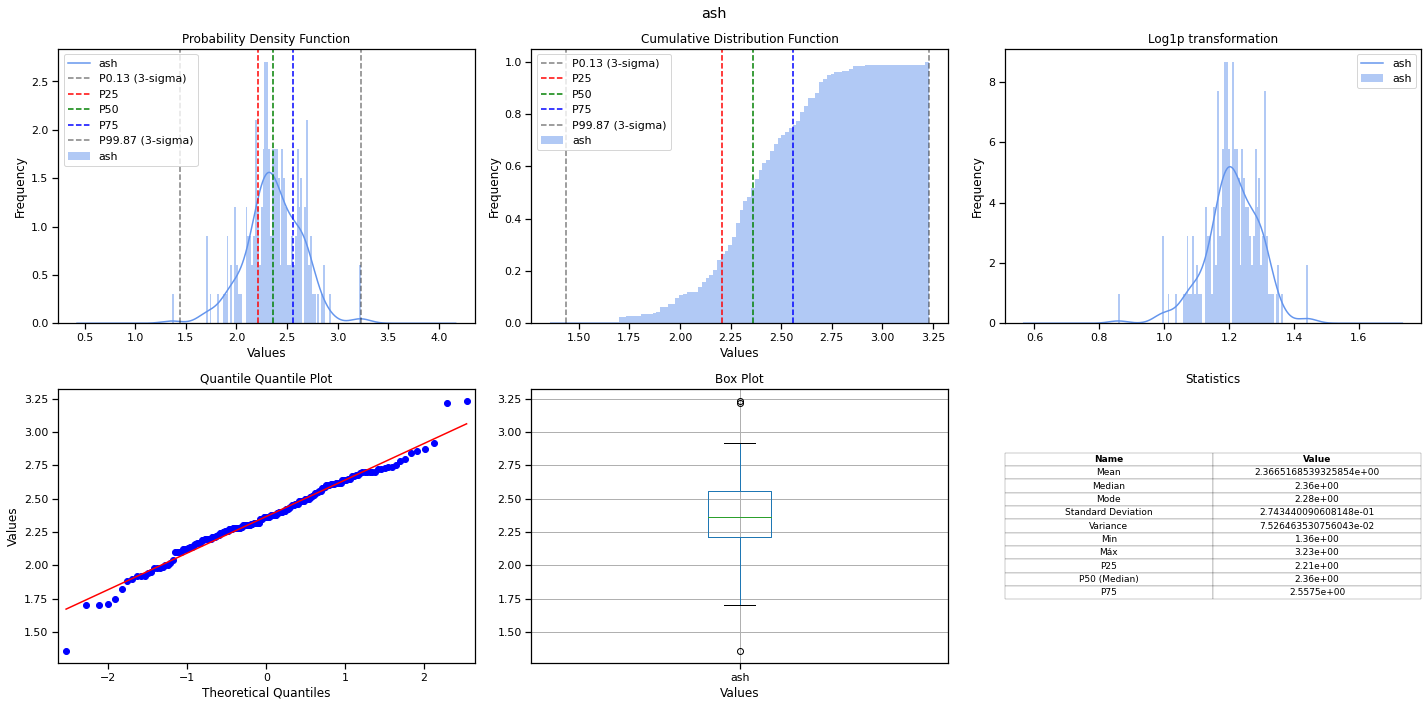

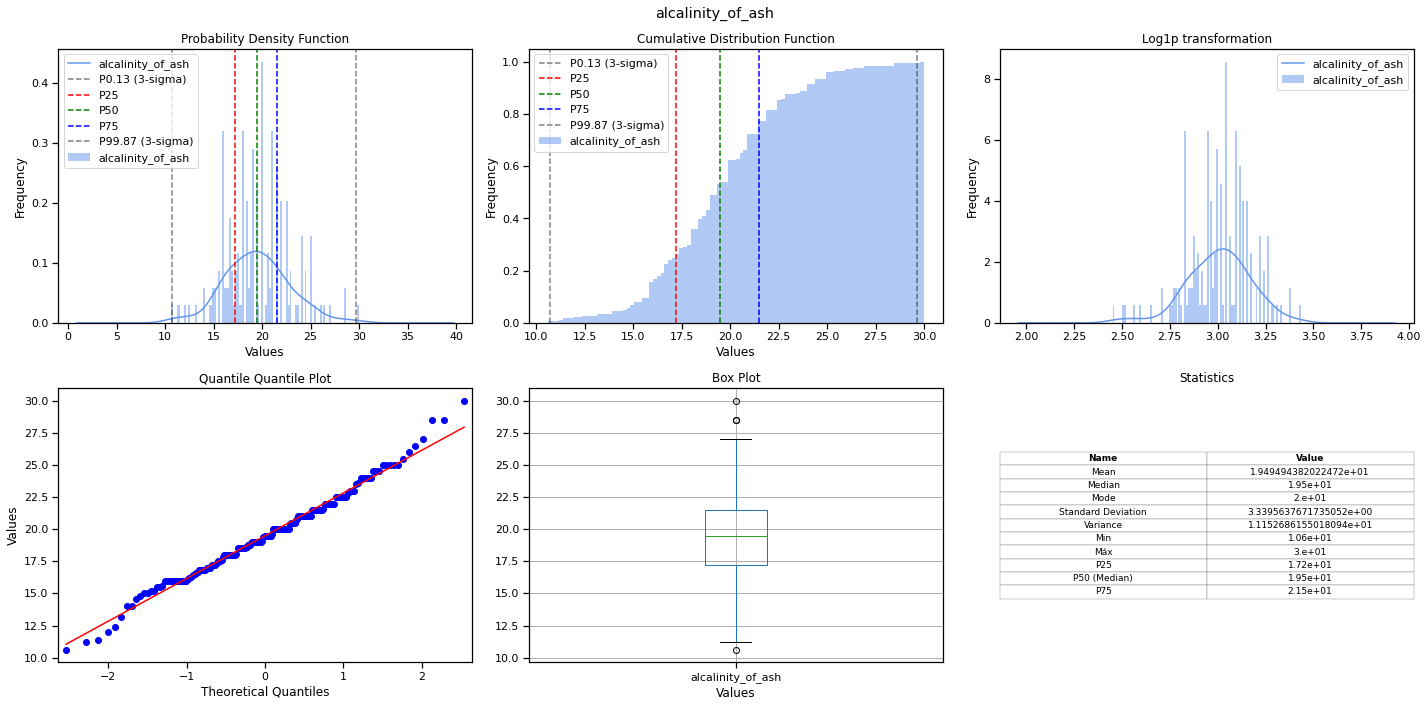

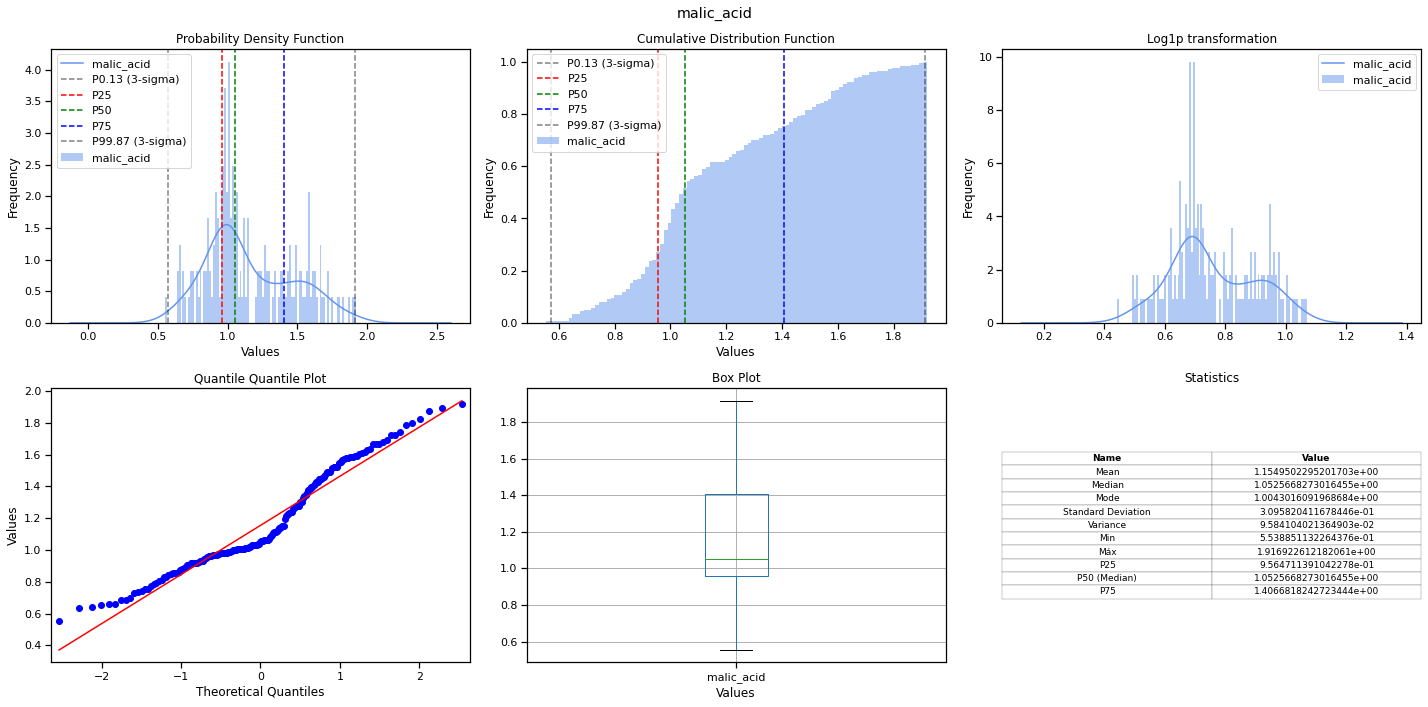

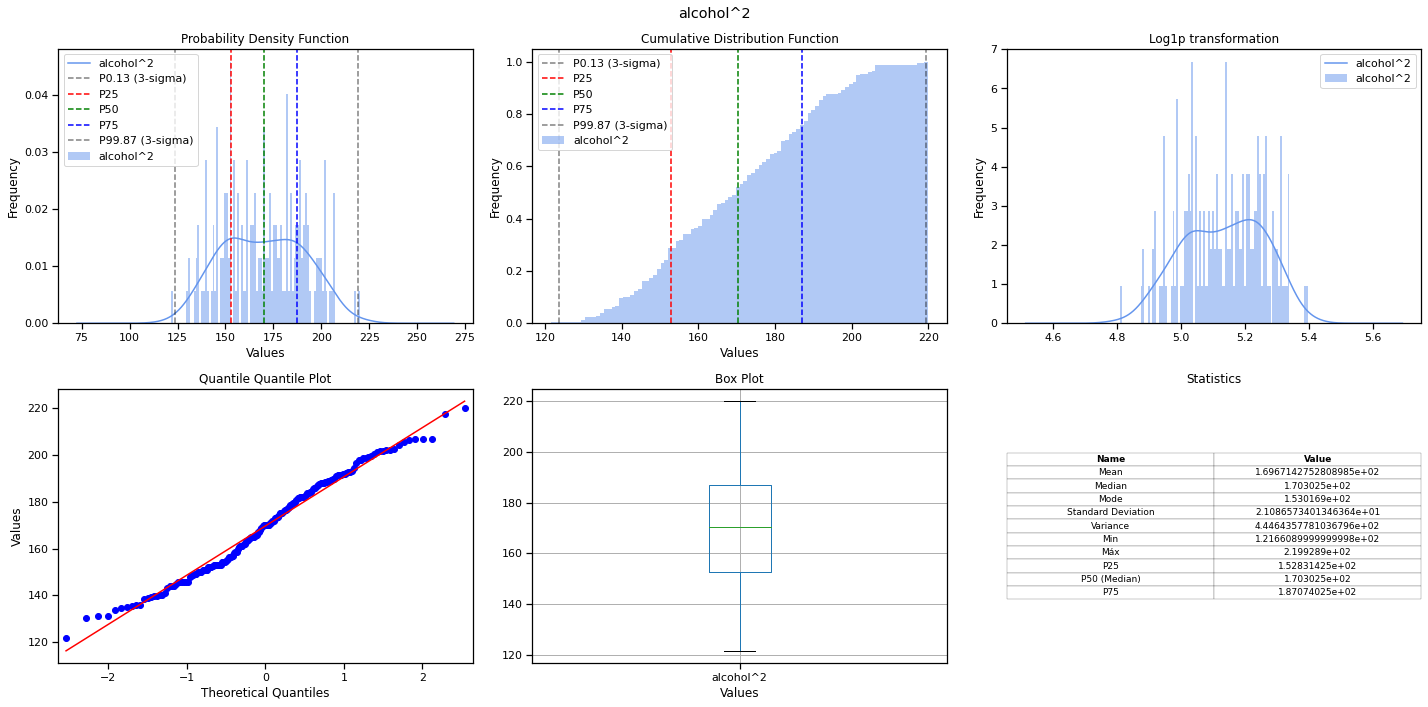

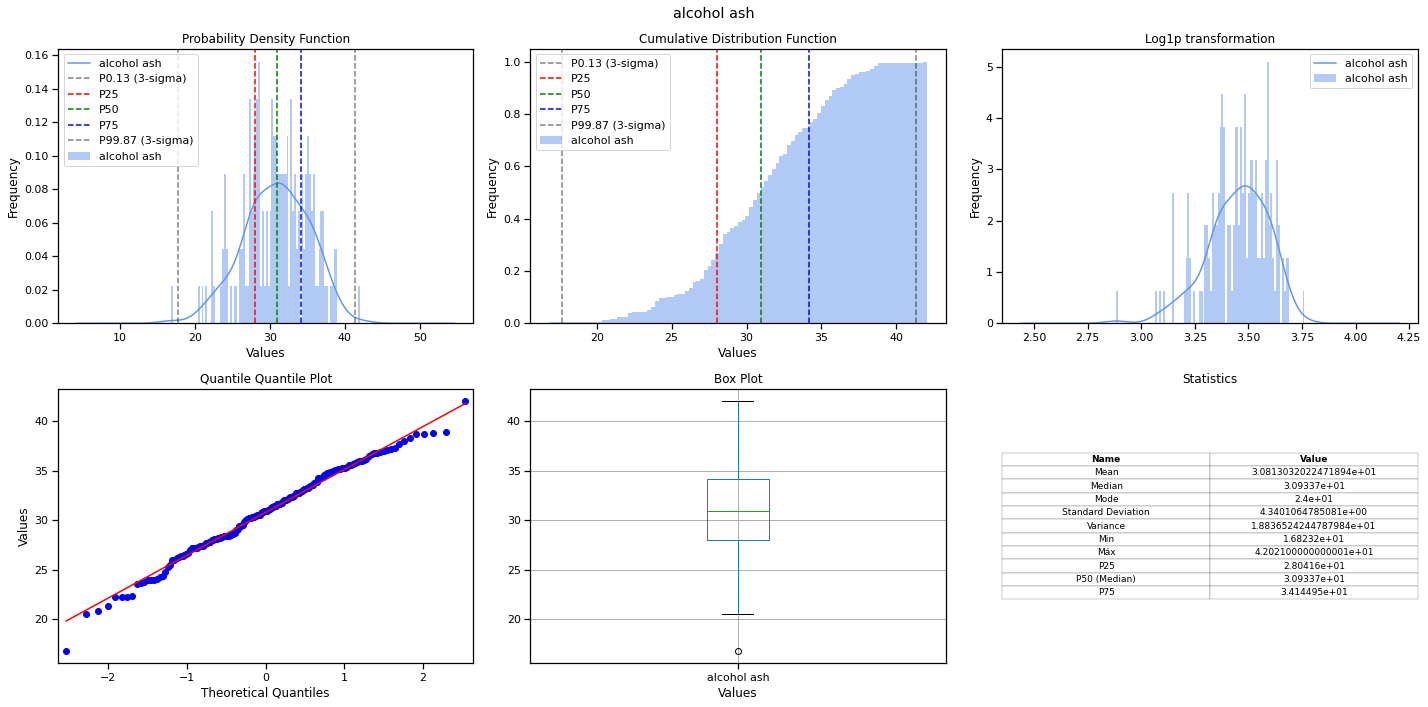

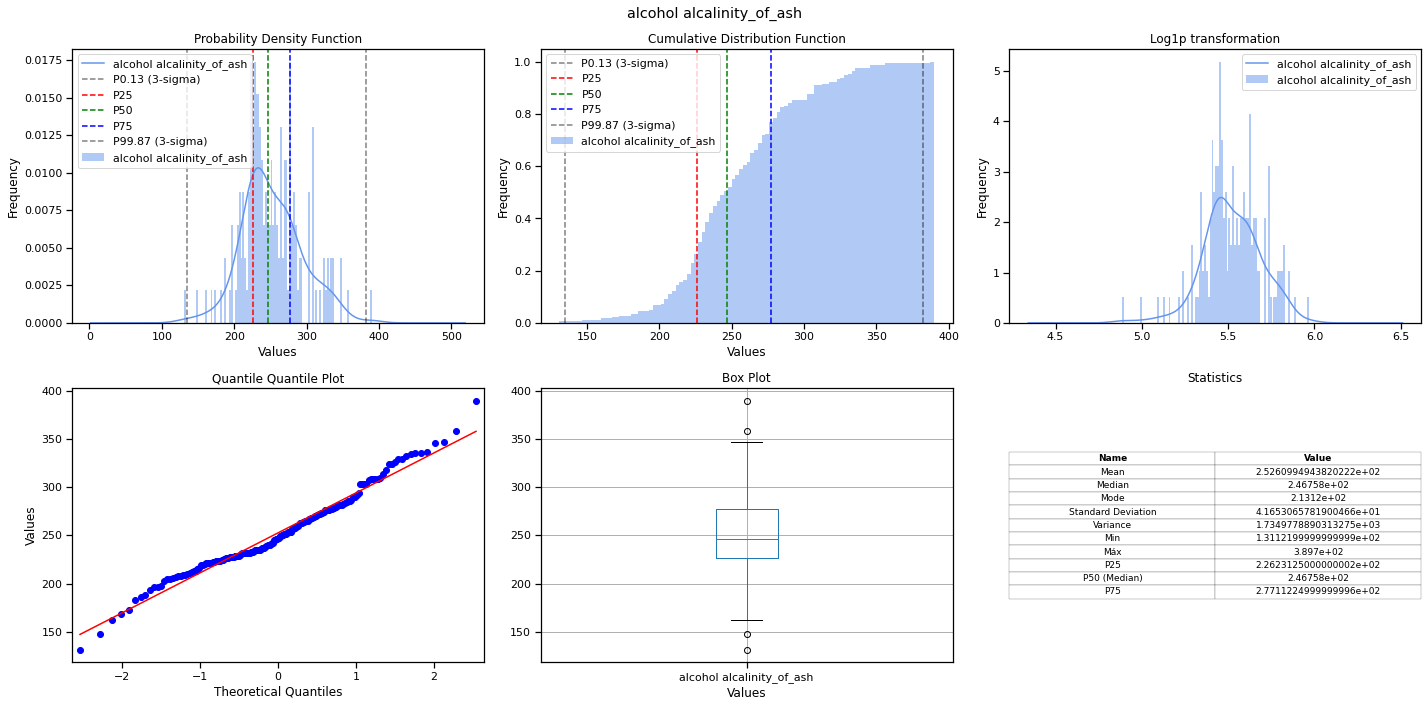

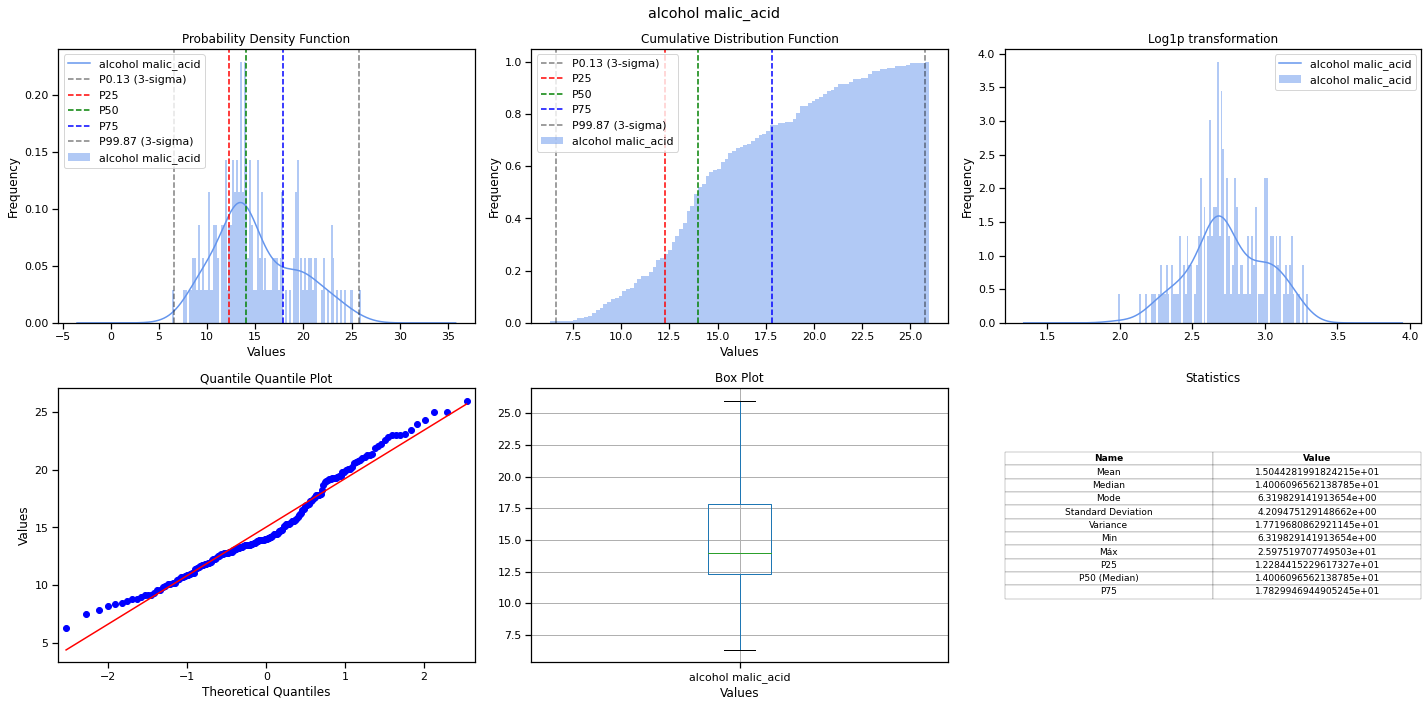

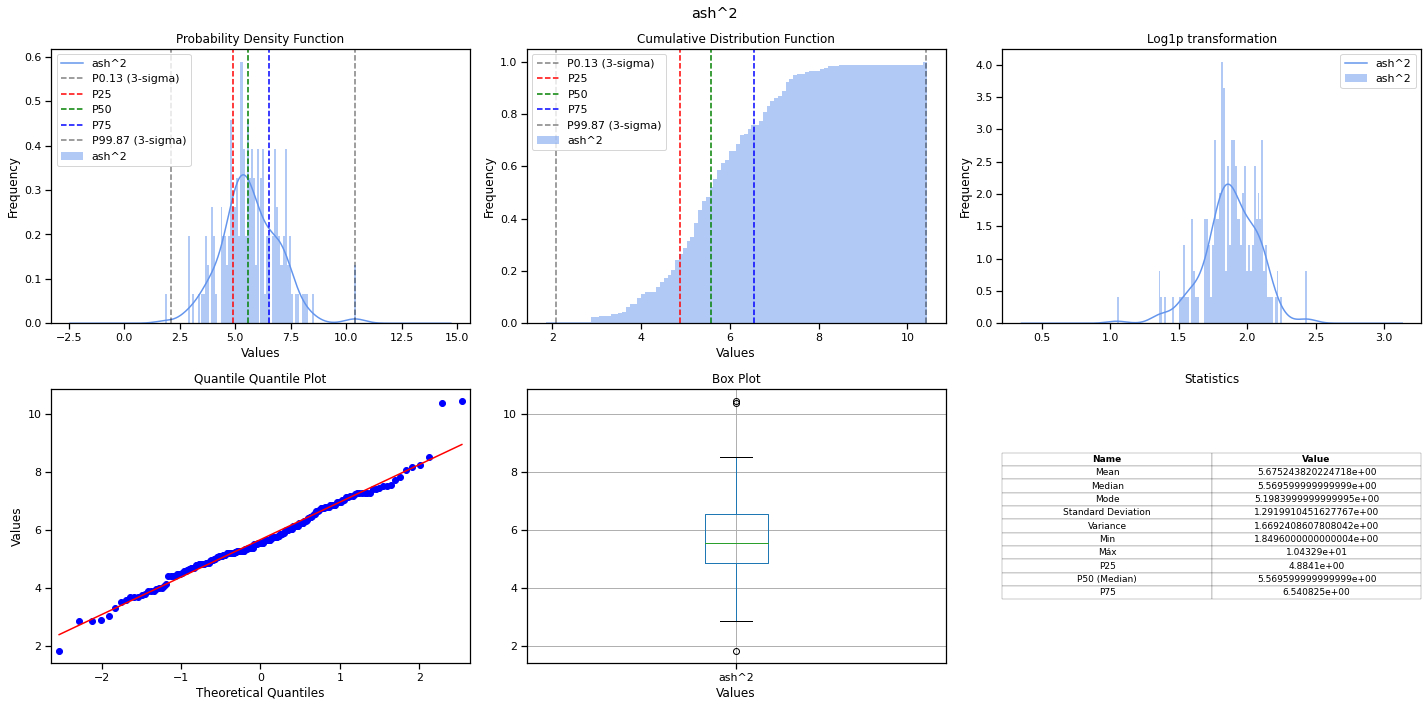

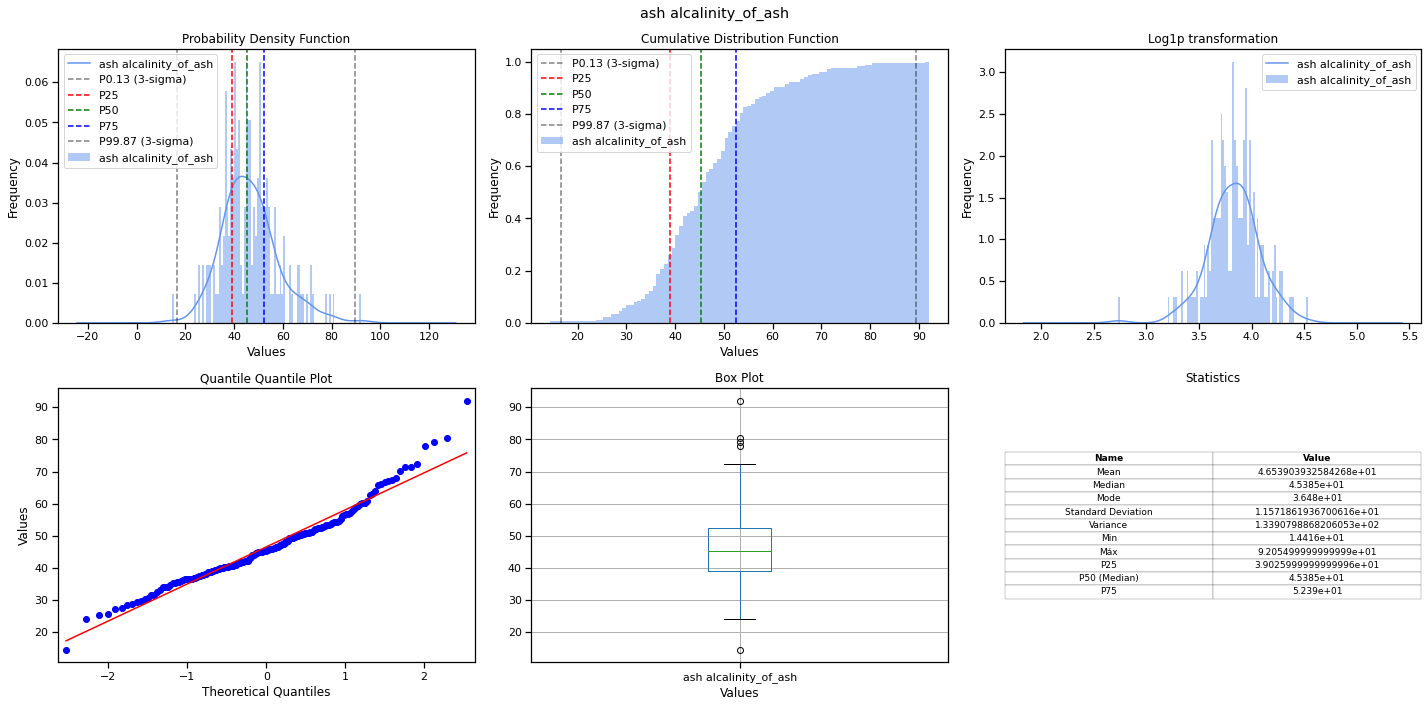

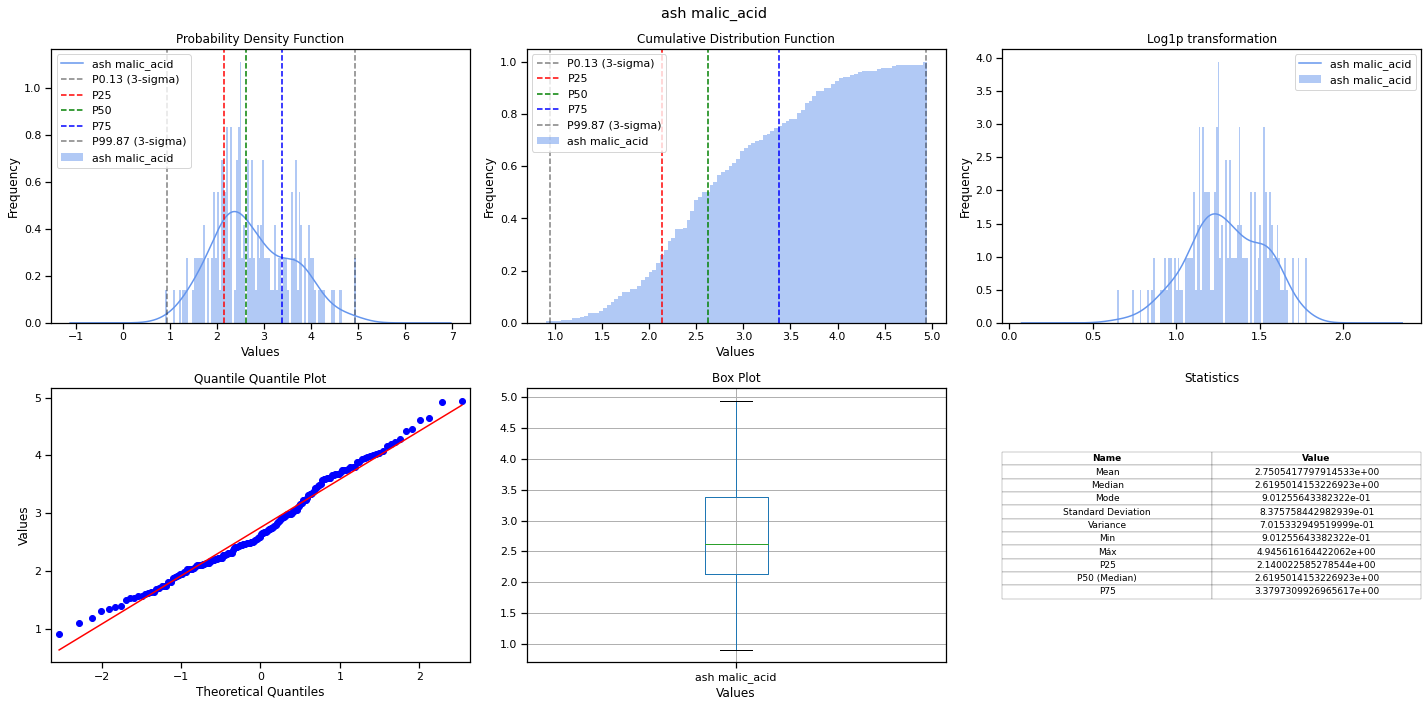

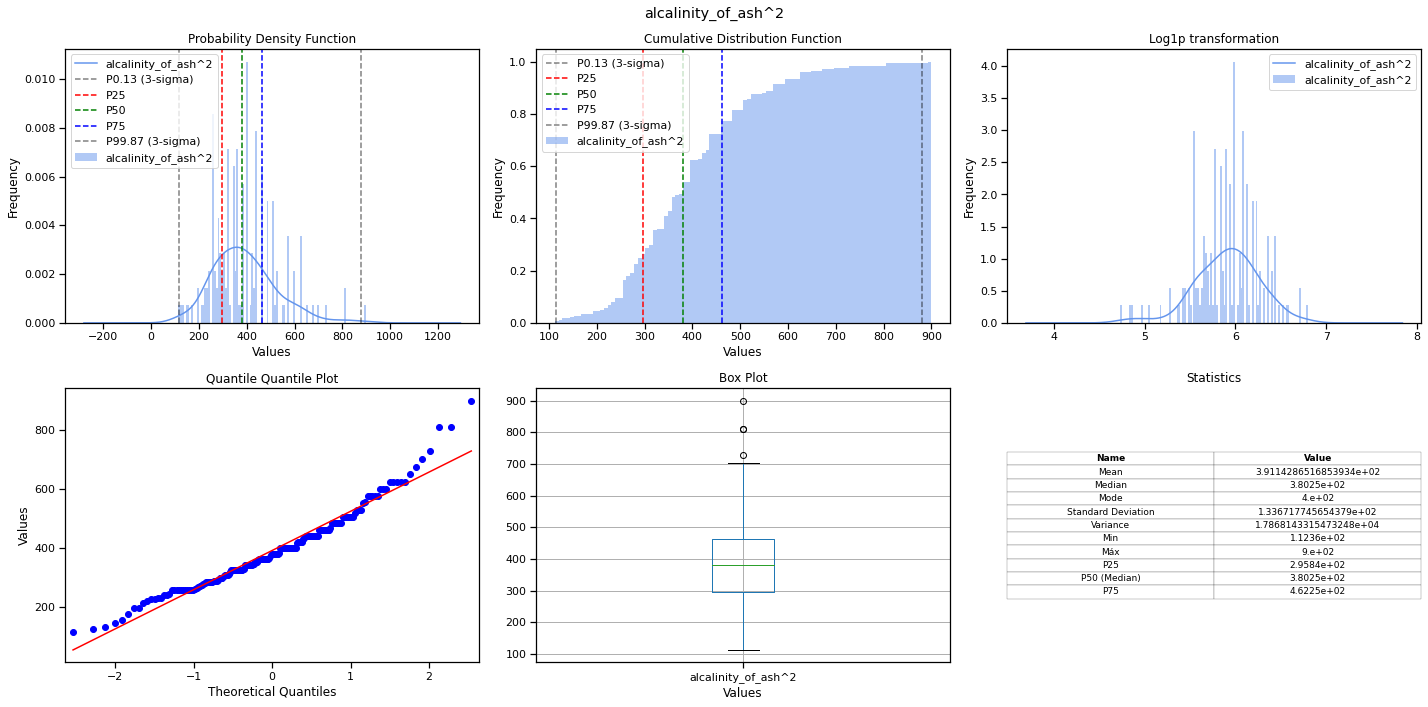

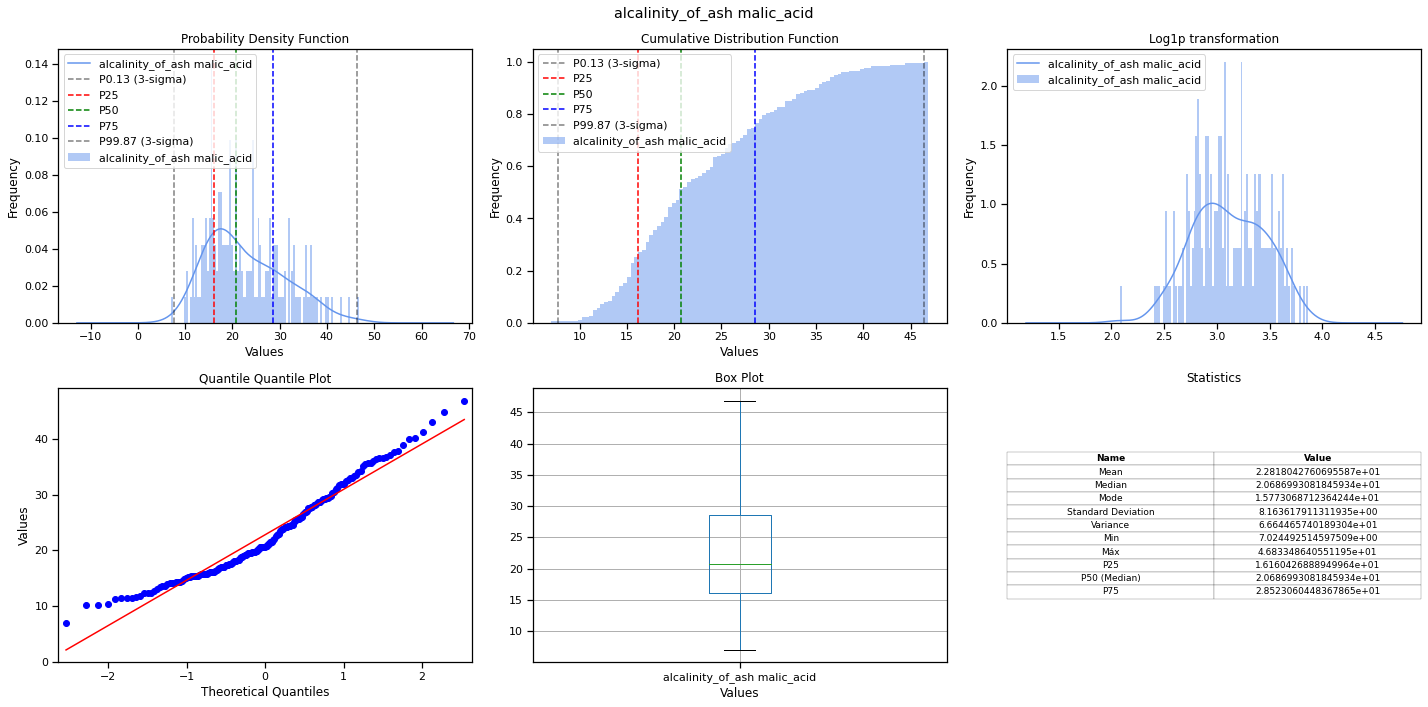

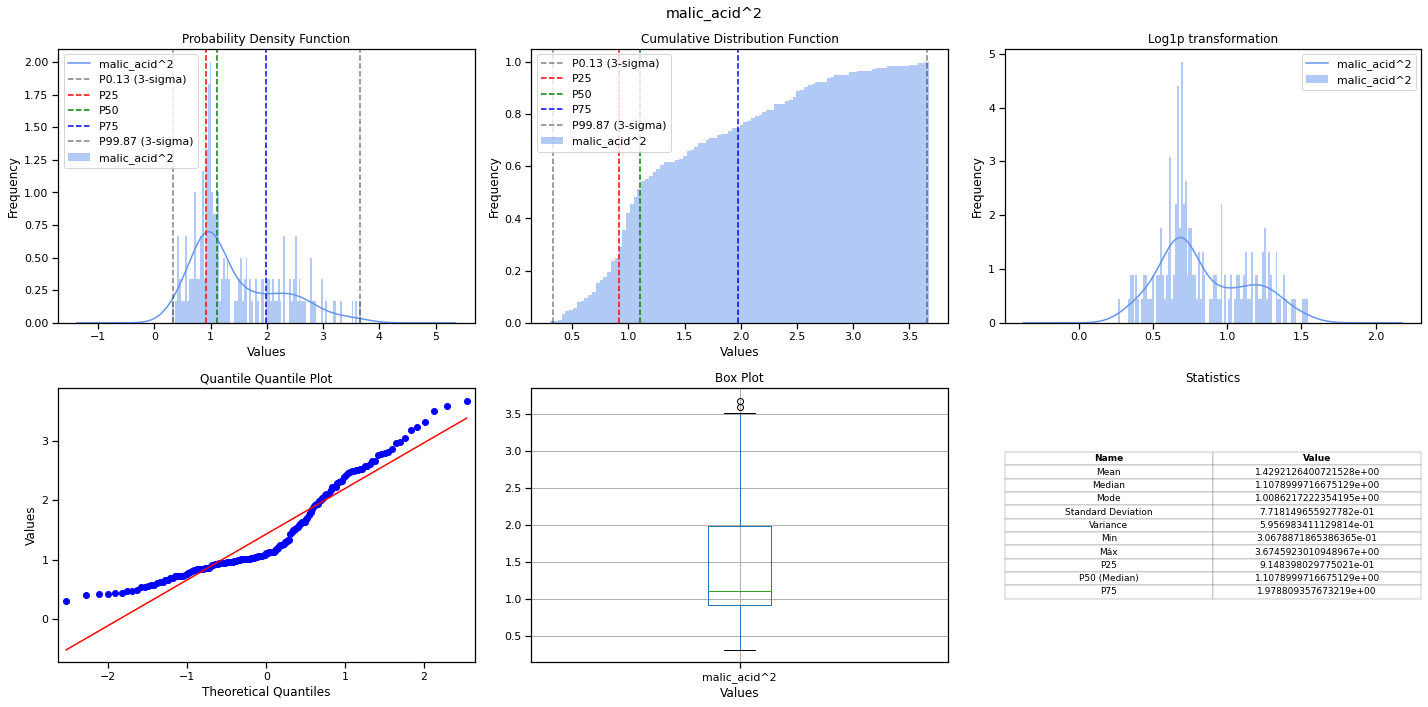

In [77]:
# Create plots after feature engineering
mk_plots(data[data.columns.drop(['1','target'])])

C:\Users\Trabajo\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Trabajo\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Trabajo\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


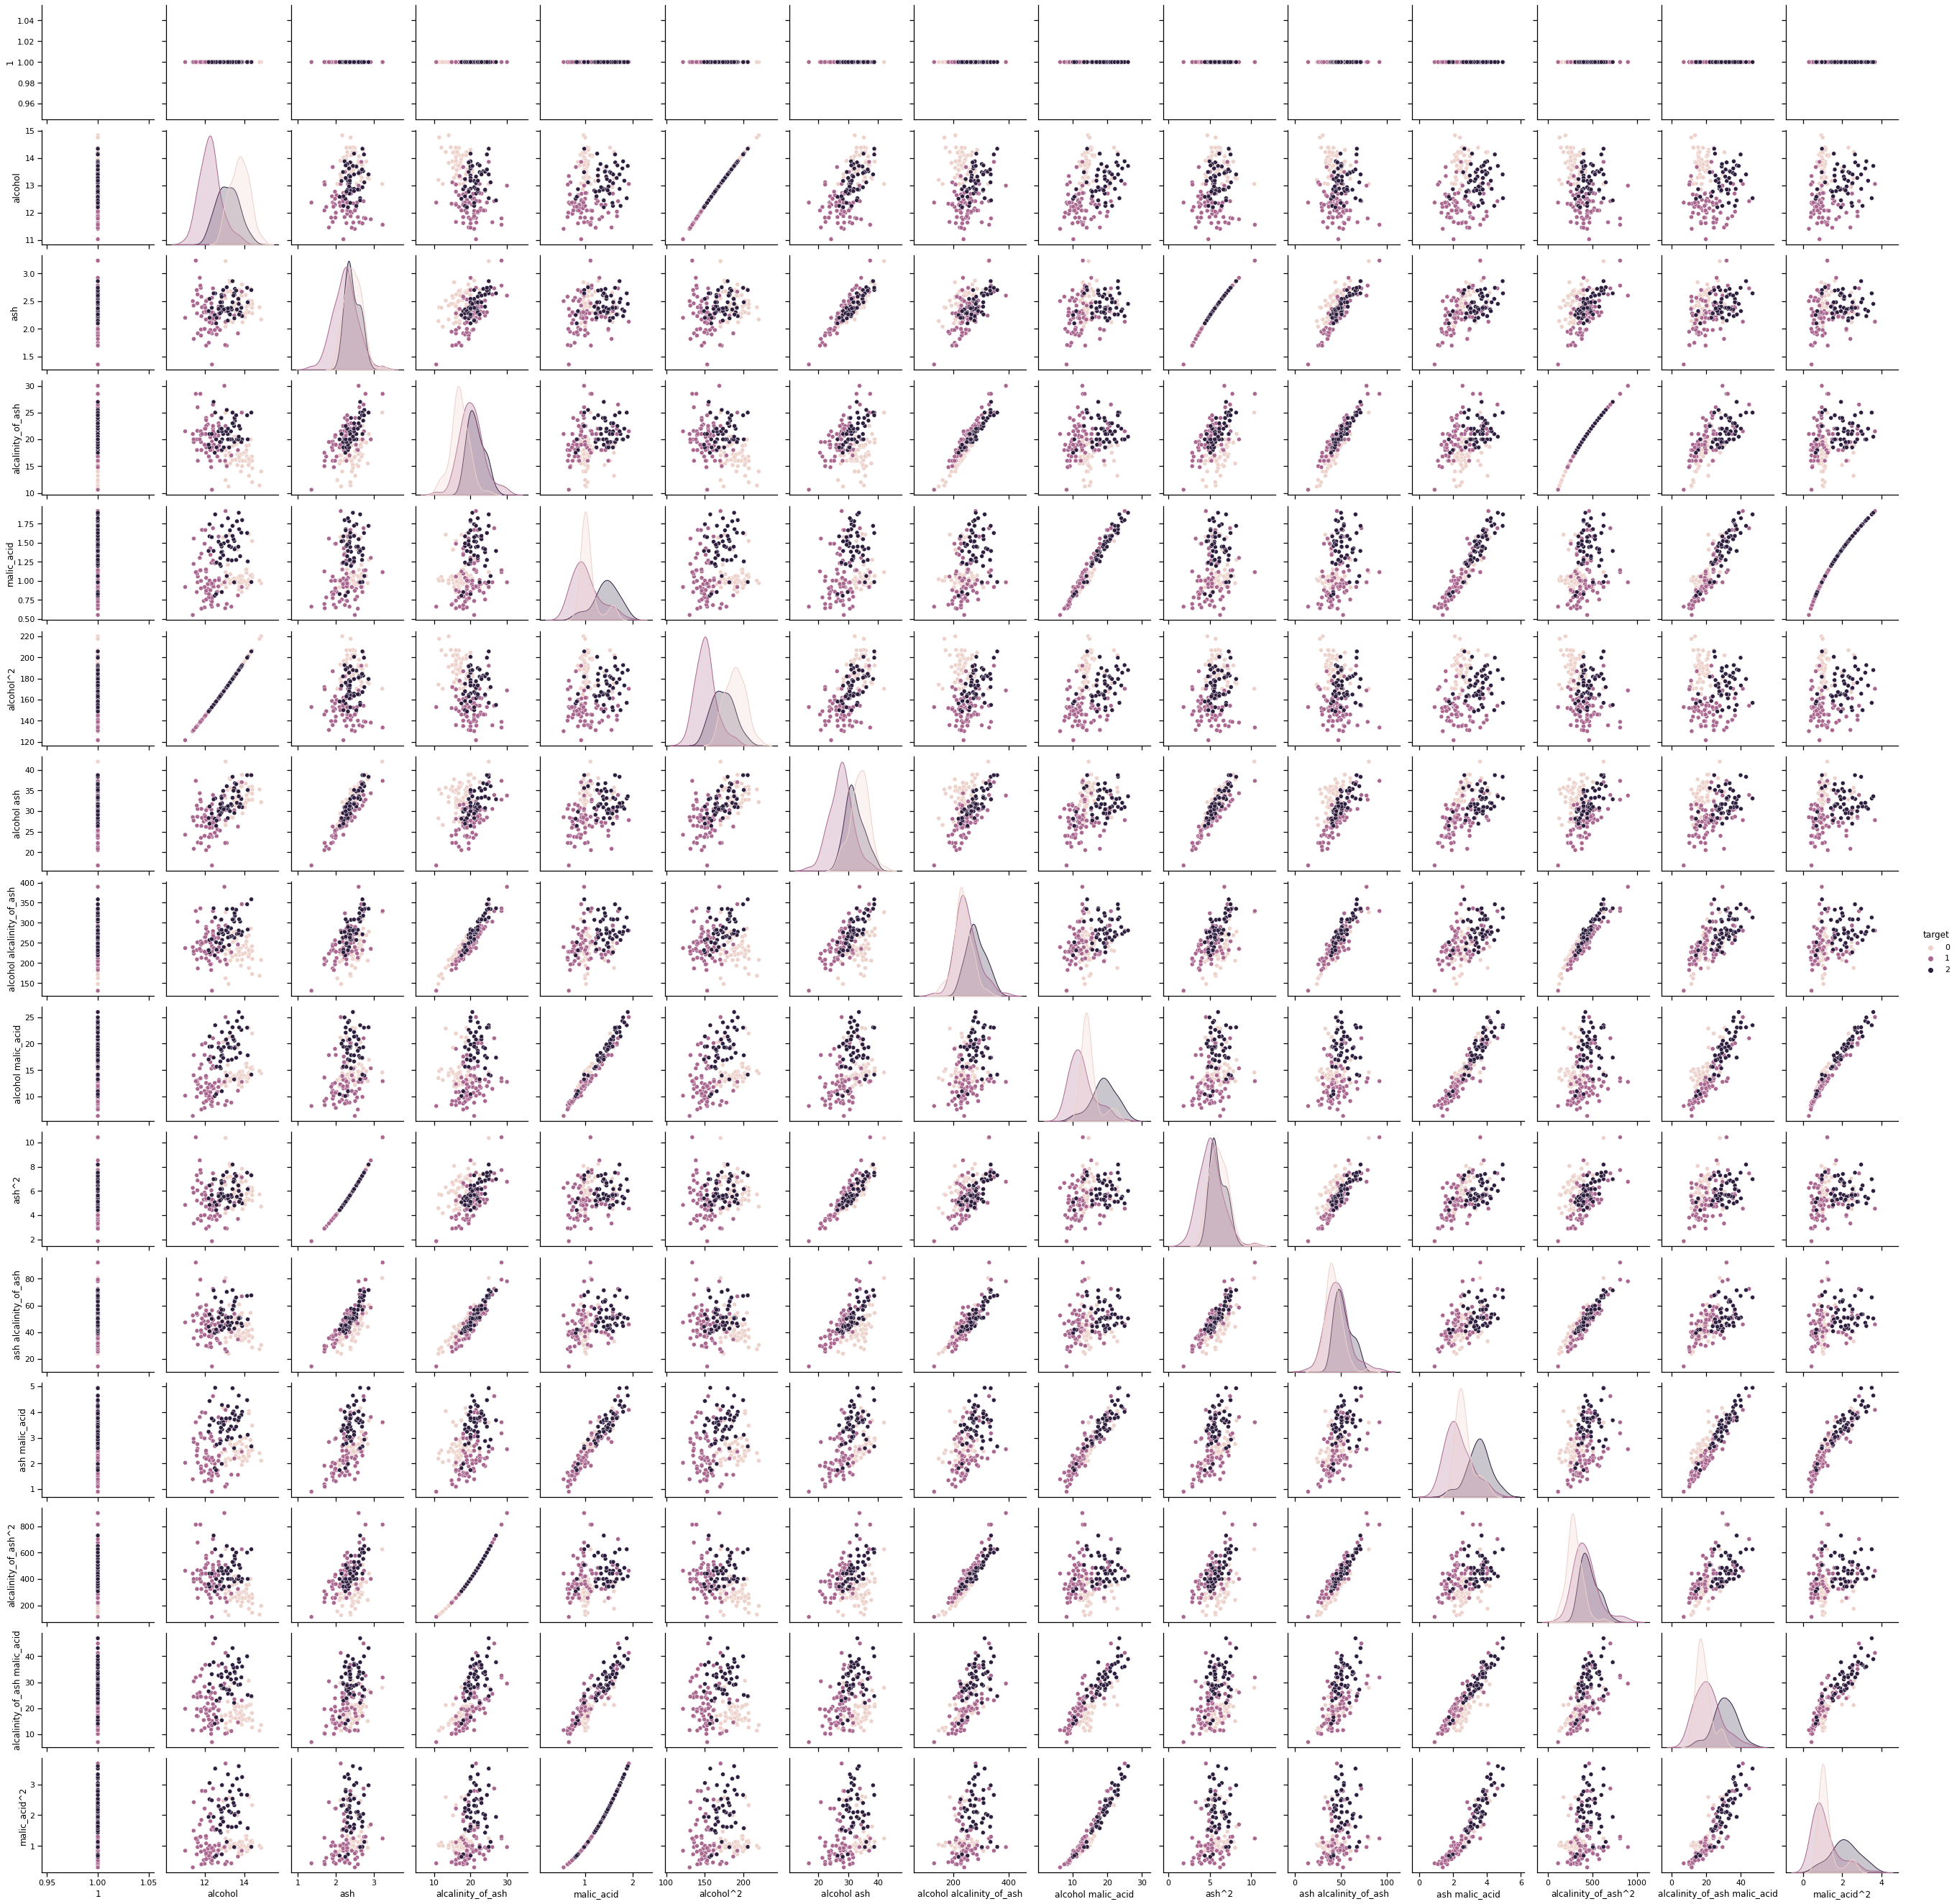

In [78]:
# Make correlation and distribution plots for features
sns.pairplot(data, hue='target')

In [83]:
# Apply Hypothesis Tests

# H0_1: La distribución de ceniza en un vino de la misma region es normal
# Ha_1: La distribución de ceniza en un vino de la misma region no es normal

# D'Agostino and Pearson's
from scipy.stats import normaltest  # Test de hipotesis para saber si una distribución difiere de la distribución normal

stat, pval = normaltest(a=data['ash'])

print('stat=%.3f, p=%.3f' % (stat, pval))
if pval > 0.05:
    print('H0 not rejected')
else:
    print('H0 rejected')


# H0_2 : La cantidad de ceniza promedio en un vino de la misma region es == 2.3 (mismo valor que la mediana).
# Ha_2 : La cantidad de ceniza promedio en un vino de la misma region es != 2.3.

# T-test
from scipy.stats import ttest_1samp as ttest  # Test de hipotesis de que el promedio de la observacion es igual
                                              # al promedio de la poblacion (popmean)

stat, pval = ttest(a=data['ash'], popmean=2.36)

print('stat=%.3f, p=%.3f' % (stat, pval))
if pval > 0.05:
    print('H0 not rejected')
else:
    print('H0 rejected')
    
# H0_2 : La cantidad de alcohol promedio en un vino de la misma region es 14.

stat=6.631, p=0.036
H0 rejected
stat=0.317, p=0.752
H0 not rejected


In [81]:
print(data.columns)

Index(['1', 'alcohol', 'ash', 'alcalinity_of_ash', 'malic_acid', 'alcohol^2',
       'alcohol ash', 'alcohol alcalinity_of_ash', 'alcohol malic_acid',
       'ash^2', 'ash alcalinity_of_ash', 'ash malic_acid',
       'alcalinity_of_ash^2', 'alcalinity_of_ash malic_acid', 'malic_acid^2',
       'target'],
      dtype='object')


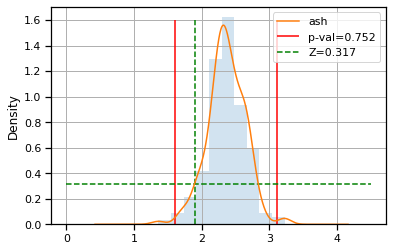

In [119]:
data.ash.hist(density=True, alpha=0.2)
kde=data.ash.plot.kde()
plt.vlines(data.ash.mean() + 0.752, 0, 1.6, 'r', label='p-val=0.752')
plt.vlines(data.ash.mean() - 0.752, 0, 1.6, 'r')
plt.vlines(1.9, 0, 1.6, 'g', linestyle='dashed')
plt.hlines(0.317, 0, 4.5,'g', linestyle='dashed', label='Z=0.317')
plt.legend()
plt.grid()